In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from scipy import stats
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import StratifiedKFold

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("Healthcare_dataset.xlsx",sheet_name="Dataset")

In [3]:
df.head()

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0   P1       Persistent    Male      Caucasian  Not Hispanic     West   
1   P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2   P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3   P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4   P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   

  Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0        >75  GENERAL PRACTITIONER              Others   
1      55-65  GENERAL PRACTITIONER              Others   
2      65-75  GENERAL PRACTITIONER              Others   
3        >75  GENERAL PRACTITIONER              Others   
4        >75  GENERAL PRACTITIONER              Others   

       Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
0  OB/GYN/Others/PCP/Unknown  ...                                   N   
1  OB/GYN/Others/PCP/Unknown  ...                                   N   
2  OB/GYN/Others/PCP/Unknown  ...                                   N   
3  OB/GYN/Others/PCP/Unknown  ...                                   N   
4  OB/GYN/Others/PCP/Unknown  ...                                   N   

  Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                       N                             N   
1                       N                             N   
2                       Y                             N   
3                       N                             N   
4                       N                             N   

  Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                        N                       N   
1                        N                       N   
2                        N                       N   
3                        N                       N   
4                        N                       N   

  Risk_Hysterectomy_Oophorectomy Risk_Estrogen_Deficiency Risk_Immobilization  \
0                              N                        N                   N   
1                              N                        N                   N   
2                              N                        N                   N   
3                              N                        N                   N   
4                              N                        N                   N   

  Risk_Recurring_Falls Count_Of_Risks  
0                    N              0  
1                    N              0  
2                    N              2  
3                    N              1  
4                    N              1  

[5 rows x 69 columns]

In [4]:
df["Age_Bucket"]=df["Age_Bucket"].apply(lambda x: x.replace(">","over ")).apply(lambda x: x.replace("<","under ")) #for the xgboost column error

In [5]:
df.drop("Ptid",axis=1,inplace=True)

In [6]:
print("The number of rows: "+str(df.shape[0]))
print("The number of columns: "+str(df.shape[1]))

The number of rows: 3424
The number of columns: 68


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Persistency_Flag                                                    3424 non-null   object
 1   Gender                                                              3424 non-null   object
 2   Race                                                                3424 non-null   object
 3   Ethnicity                                                           3424 non-null   object
 4   Region                                                              3424 non-null   object
 5   Age_Bucket                                                          3424 non-null   object
 6   Ntm_Speciality                                                      3424 non-null   object
 7   Ntm_Specialist_Flag     

In [8]:
df.isnull().sum().sum()

0

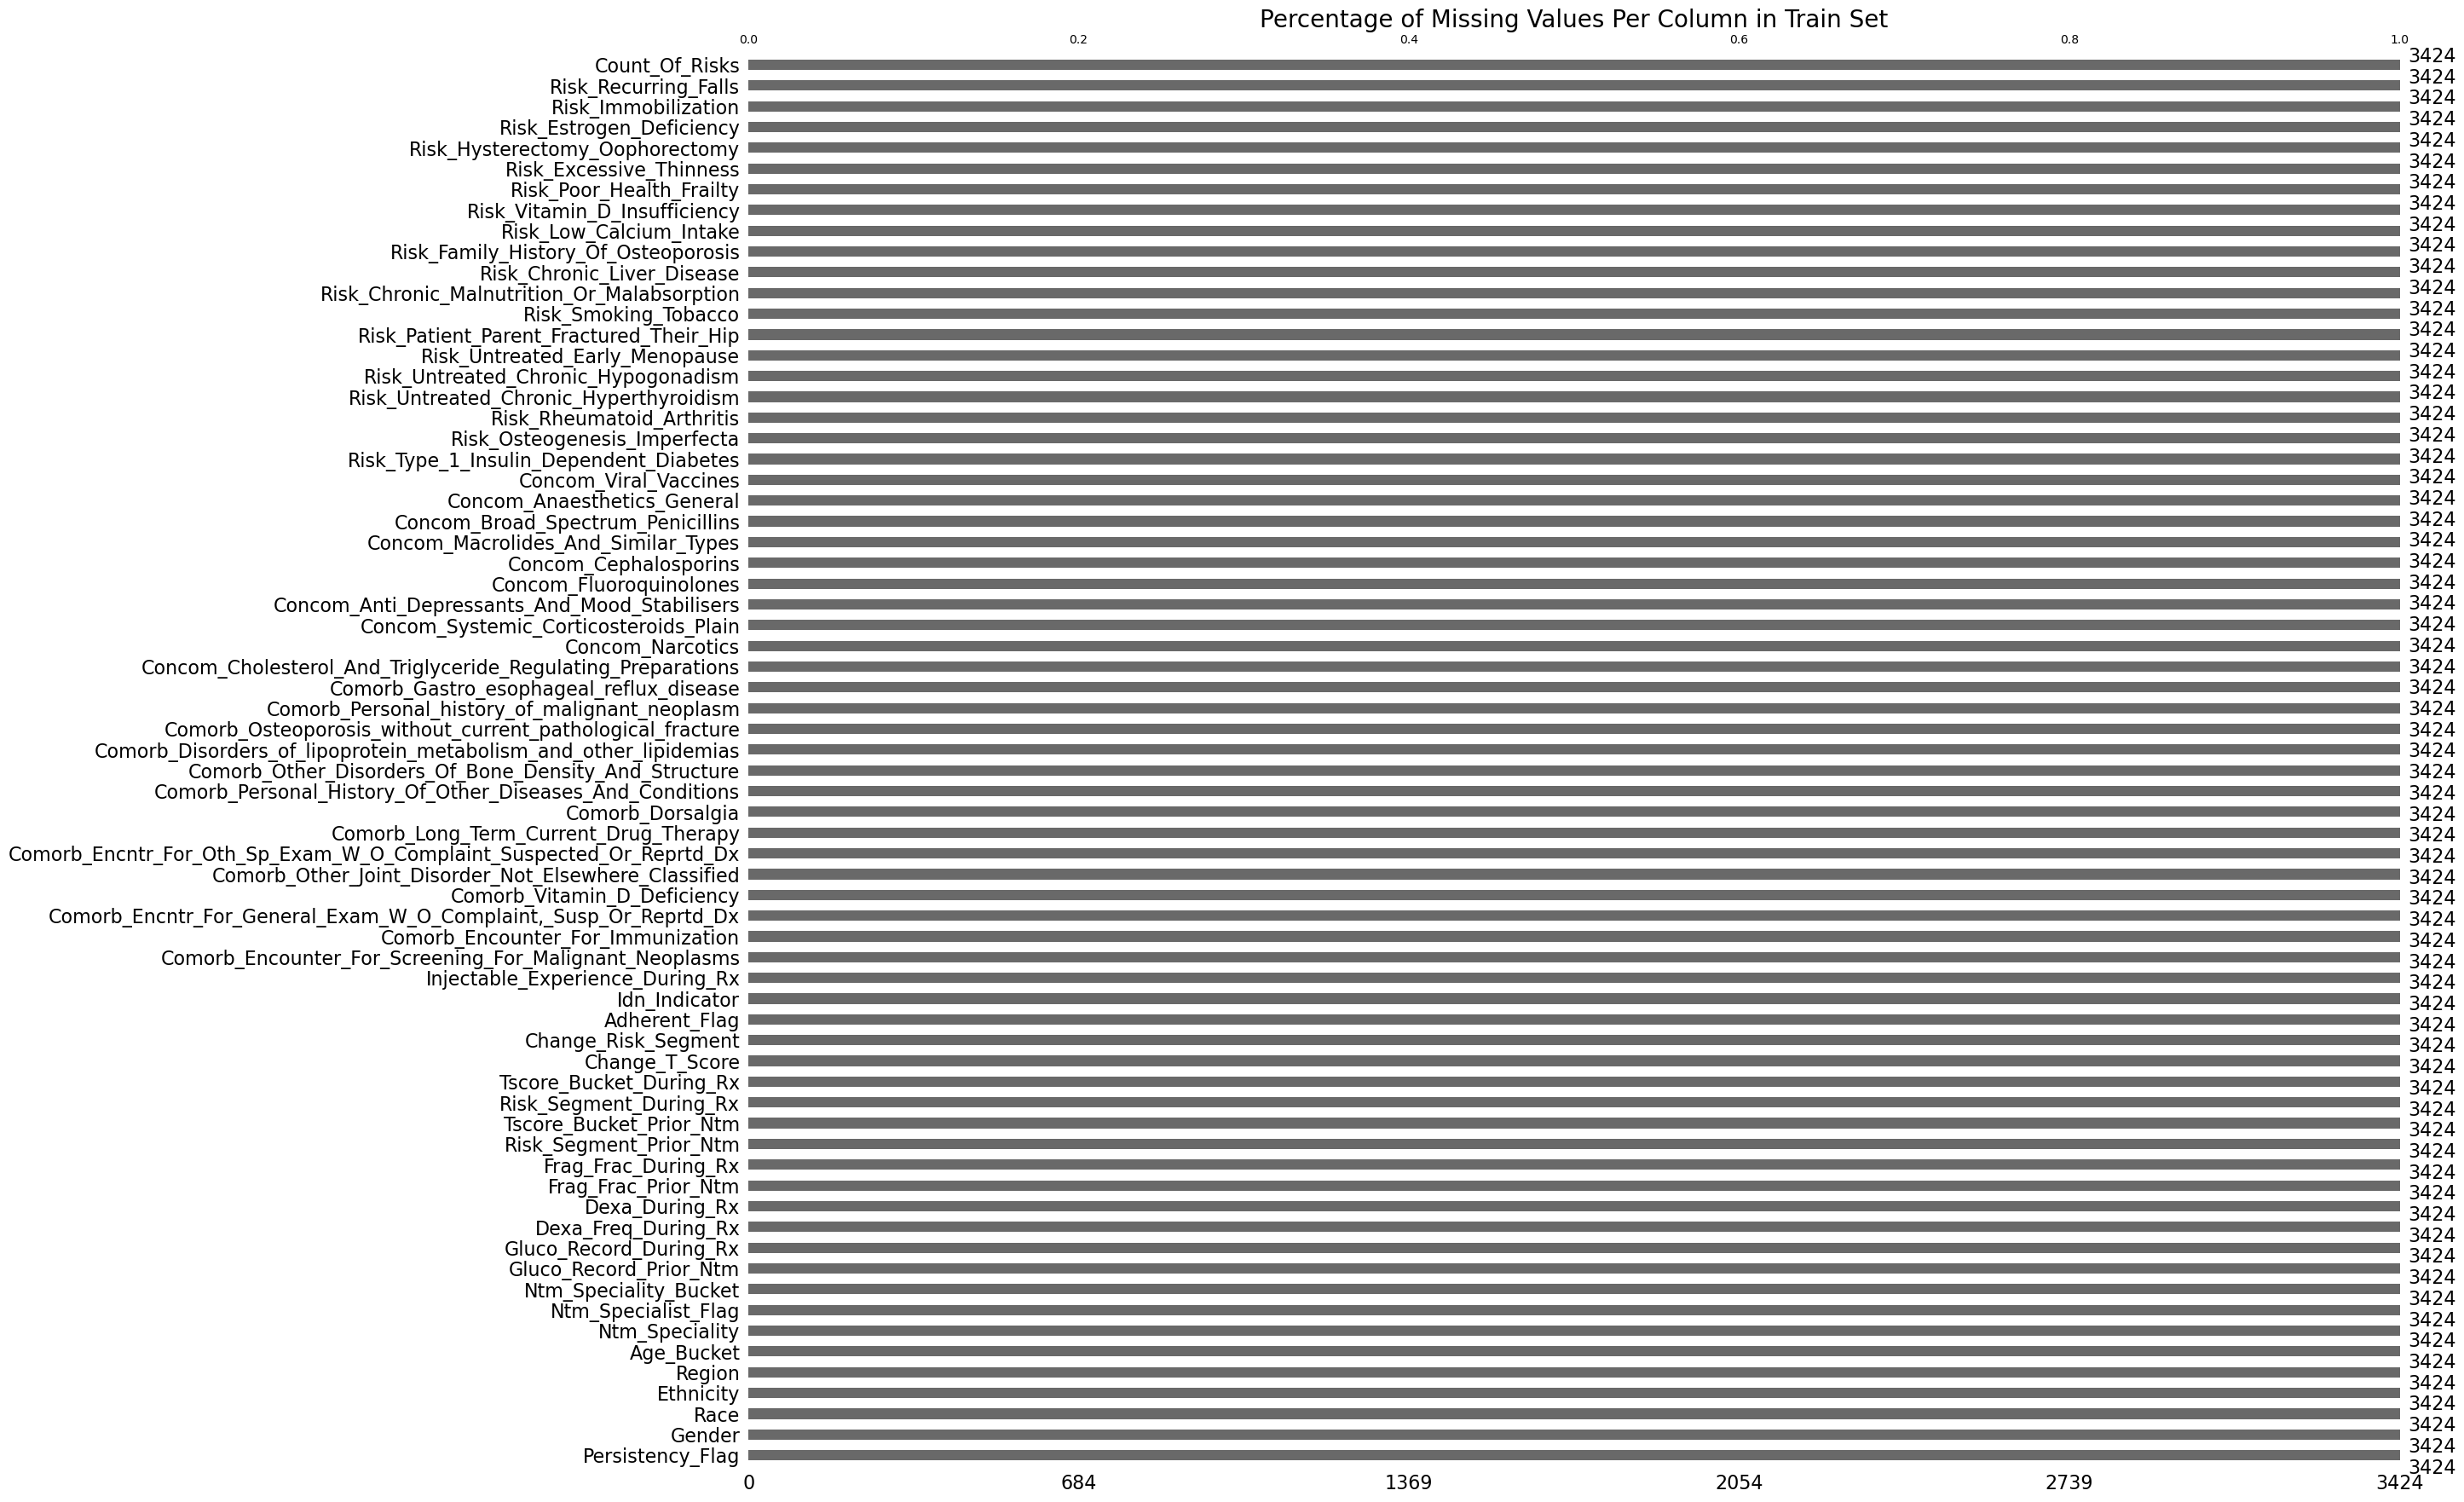

In [9]:
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':20})
msno.bar(df);


In [10]:
df.nunique().sort_values(ascending=False
                        ).to_frame()

0
Dexa_Freq_During_Rx                                 58
Ntm_Speciality                                      36
Count_Of_Risks                                       8
Region                                               5
Change_Risk_Segment                                  4
...                                                 ..
Gender                                               2
Comorb_Osteoporosis_without_current_pathologica...   2
Comorb_Personal_history_of_malignant_neoplasm        2
Comorb_Gastro_esophageal_reflux_disease              2
Comorb_Disorders_of_lipoprotein_metabolism_and_...   2

[68 rows x 1 columns]

In [11]:
df["Dexa_Freq_During_Rx"].value_counts()

0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
1        24
2        24
13       19
20       15
16       14
18       14
22       13
26       10
24       10
15        9
30        7
17        7
28        7
21        7
36        5
19        3
42        3
32        3
34        3
52        2
48        2
58        2
25        2
39        2
88        2
54        1
146       1
50        1
35        1
44        1
108       1
72        1
40        1
68        1
45        1
38        1
69        1
118       1
66        1
110       1
33        1
23        1
27        1
81        1
37        1
29        1
Name: Dexa_Freq_During_Rx, dtype: int64

In [12]:
df.Dexa_Freq_During_Rx.value_counts()

0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
1        24
2        24
13       19
20       15
16       14
18       14
22       13
26       10
24       10
15        9
30        7
17        7
28        7
21        7
36        5
19        3
42        3
32        3
34        3
52        2
48        2
58        2
25        2
39        2
88        2
54        1
146       1
50        1
35        1
44        1
108       1
72        1
40        1
68        1
45        1
38        1
69        1
118       1
66        1
110       1
33        1
23        1
27        1
81        1
37        1
29        1
Name: Dexa_Freq_During_Rx, dtype: int64

In [13]:
for column in df.columns:
        calculation=(len(df[column])-df[column].nunique())/len(df[column])*100   #If the difference of uniq values from the data set is greater than 90 percent, we should qualify it as Categorical.
        if calculation>90 :
             df[column]=df[column].astype("category")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   Persistency_Flag                                                    3424 non-null   category
 1   Gender                                                              3424 non-null   category
 2   Race                                                                3424 non-null   category
 3   Ethnicity                                                           3424 non-null   category
 4   Region                                                              3424 non-null   category
 5   Age_Bucket                                                          3424 non-null   category
 6   Ntm_Speciality                                                      3424 non-null   category
 7   Ntm_Sp

In [15]:
df.describe()

Persistency_Flag  Gender       Race     Ethnicity   Region Age_Bucket  \
count              3424    3424       3424          3424     3424       3424   
unique                2       2          4             3        5          4   
top      Non-Persistent  Female  Caucasian  Not Hispanic  Midwest    over 75   
freq               2135    3230       3148          3235     1383       1439   

              Ntm_Speciality Ntm_Specialist_Flag      Ntm_Speciality_Bucket  \
count                   3424                3424                       3424   
unique                    36                   2                          3   
top     GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
freq                    1535                2013                       2104   

       Gluco_Record_Prior_Ntm  ... Risk_Family_History_Of_Osteoporosis  \
count                    3424  ...                                3424   
unique                      2  ...                                   2   
top                         N  ...                                   N   
freq                     2619  ...                                3066   

        Risk_Low_Calcium_Intake Risk_Vitamin_D_Insufficiency  \
count                      3424                         3424   
unique                        2                            2   
top                           N                            N   
freq                       3382                         1788   

       Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
count                      3424                    3424   
unique                        2                       2   
top                           N                       N   
freq                       3232                    3357   

       Risk_Hysterectomy_Oophorectomy Risk_Estrogen_Deficiency  \
count                            3424                     3424   
unique                              2                        2   
top                                 N                        N   
freq                             3370                     3413   

       Risk_Immobilization Risk_Recurring_Falls Count_Of_Risks  
count                 3424                 3424           3424  
unique                   2                    2              8  
top                      N                    N              1  
freq                  3410                 3355           1242  

[4 rows x 68 columns]

In [16]:
df.describe().T.reset_index().sort_values("unique",ascending=False)

index count unique  \
11                                Dexa_Freq_During_Rx  3424     58   
6                                      Ntm_Speciality  3424     36   
67                                     Count_Of_Risks  3424      8   
4                                              Region  3424      5   
20                                Change_Risk_Segment  3424      4   
..                                                ...   ...    ...   
1                                              Gender  3424      2   
35  Comorb_Osteoporosis_without_current_pathologic...  3424      2   
36      Comorb_Personal_history_of_malignant_neoplasm  3424      2   
37            Comorb_Gastro_esophageal_reflux_disease  3424      2   
34  Comorb_Disorders_of_lipoprotein_metabolism_and...  3424      2   

                     top  freq  
11                     0  2488  
6   GENERAL PRACTITIONER  1535  
67                     1  1242  
4                Midwest  1383  
20               Unknown  2229  
..                   ...   ...  
1                 Female  3230  
35                     N  2507  
36                     N  2775  
37                     N  2794  
34                     Y  1765  

[68 rows x 5 columns]

In [17]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col]) 
    
df_encoded.head()

Persistency_Flag  Gender  Race  Ethnicity  Region  Age_Bucket  \
0                 1       1     2          1       4           2   
1                 0       1     1          1       4           0   
2                 0       0     3          0       0           1   
3                 0       0     2          1       0           2   
4                 0       0     2          1       0           2   

   Ntm_Speciality  Ntm_Specialist_Flag  Ntm_Speciality_Bucket  \
0               5                    0                      1   
1               5                    0                      1   
2               5                    0                      1   
3               5                    0                      1   
4               5                    0                      1   

   Gluco_Record_Prior_Ntm  ...  Risk_Family_History_Of_Osteoporosis  \
0                       0  ...                                    0   
1                       0  ...                                    0   
2                       0  ...                                    0   
3                       0  ...                                    0   
4                       1  ...                                    0   

   Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                        0                             0   
1                        0                             0   
2                        1                             0   
3                        0                             0   
4                        0                             0   

   Risk_Poor_Health_Frailty  Risk_Excessive_Thinness  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   Risk_Hysterectomy_Oophorectomy  Risk_Estrogen_Deficiency  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   

   Risk_Immobilization  Risk_Recurring_Falls  Count_Of_Risks  
0                    0                     0               0  
1                    0                     0               0  
2                    0                     0               2  
3                    0                     0               1  
4                    0                     0               1  

[5 rows x 68 columns]

In [18]:
df_encoded.describe()

Persistency_Flag       Gender         Race    Ethnicity       Region  \
count       3424.000000  3424.000000  3424.000000  3424.000000  3424.000000   
mean           0.376460     0.056659     1.948306     0.997956     1.781834   
std            0.484568     0.231223     0.401520     0.234969     1.608482   
min            0.000000     0.000000     0.000000     0.000000     0.000000   
25%            0.000000     0.000000     2.000000     1.000000     0.000000   
50%            0.000000     0.000000     2.000000     1.000000     3.000000   
75%            1.000000     0.000000     2.000000     1.000000     3.000000   
max            1.000000     1.000000     3.000000     2.000000     4.000000   

        Age_Bucket  Ntm_Speciality  Ntm_Specialist_Flag  \
count  3424.000000     3424.000000          3424.000000   
mean      1.303154       13.590537             0.412091   
std       0.858245       11.932789             0.492283   
min       0.000000        0.000000             0.000000   
25%       1.000000        5.000000             0.000000   
50%       1.000000        5.000000             0.000000   
75%       2.000000       30.000000             1.000000   
max       3.000000       35.000000             1.000000   

       Ntm_Speciality_Bucket  Gluco_Record_Prior_Ntm  ...  \
count            3424.000000             3424.000000  ...   
mean                0.967290                0.235105  ...   
std                 0.620126                0.424126  ...   
min                 0.000000                0.000000  ...   
25%                 1.000000                0.000000  ...   
50%                 1.000000                0.000000  ...   
75%                 1.000000                0.000000  ...   
max                 2.000000                1.000000  ...   

       Risk_Family_History_Of_Osteoporosis  Risk_Low_Calcium_Intake  \
count                          3424.000000              3424.000000   
mean                              0.104556                 0.012266   
std                               0.306025                 0.110088   
min                               0.000000                 0.000000   
25%                               0.000000                 0.000000   
50%                               0.000000                 0.000000   
75%                               0.000000                 0.000000   
max                               1.000000                 1.000000   

       Risk_Vitamin_D_Insufficiency  Risk_Poor_Health_Frailty  \
count                   3424.000000               3424.000000   
mean                       0.477804                  0.056075   
std                        0.499580                  0.230100   
min                        0.000000                  0.000000   
25%                        0.000000                  0.000000   
50%                        0.000000                  0.000000   
75%                        1.000000                  0.000000   
max                        1.000000                  1.000000   

       Risk_Excessive_Thinness  Risk_Hysterectomy_Oophorectomy  \
count              3424.000000                     3424.000000   
mean                  0.019568                        0.015771   
std                   0.138530                        0.124607   
min                   0.000000                        0.000000   
25%                   0.000000                        0.000000   
50%                   0.000000                        0.000000   
75%                   0.000000                        0.000000   
max                   1.000000                        1.000000   

       Risk_Estrogen_Deficiency  Risk_Immobilization  Risk_Recurring_Falls  \
count               3424.000000          3424.000000           3424.000000   
mean                   0.003213             0.004089              0.020152   
std                    0.056597             0.063822              0.140540   
min                    0.000000             0.000000              0.000000   
25

In [19]:
df_encoded.corr(method="spearman").sort_values(by="Persistency_Flag",ascending=False)

Persistency_Flag  \
Persistency_Flag                                            1.000000   
Dexa_Freq_During_Rx                                         0.503531   
Dexa_During_Rx                                              0.491823   
Comorb_Long_Term_Current_Drug_Therapy                       0.352760   
Comorb_Encounter_For_Screening_For_Malignant_Ne...          0.322320   
...                                                              ...   
Risk_Poor_Health_Frailty                                   -0.045277   
Risk_Immobilization                                        -0.049787   
Change_T_Score                                             -0.109136   
Ntm_Speciality_Bucket                                      -0.114787   
Tscore_Bucket_During_Rx                                    -0.157178   

                                                      Gender      Race  \
Persistency_Flag                                    0.010343 -0.014251   
Dexa_Freq_During_Rx                                -0.032940  0.025379   
Dexa_During_Rx                                     -0.031272  0.022369   
Comorb_Long_Term_Current_Drug_Therapy               0.028778  0.013559   
Comorb_Encounter_For_Screening_For_Malignant_Ne... -0.108880 -0.017277   
...                                                      ...       ...   
Risk_Poor_Health_Frailty                            0.006158 -0.001748   
Risk_Immobilization                                 0.004093  0.005631   
Change_T_Score                                      0.001749 -0.016717   
Ntm_Speciality_Bucket                              -0.020026 -0.012857   
Tscore_Bucket_During_Rx                            -0.005804  0.045274   

                                                    Ethnicity    Region  \
Persistency_Flag                                     0.001654  0.087507   
Dexa_Freq_During_Rx                                 -0.007113  0.019592   
Dexa_During_Rx                                      -0.005826  0.003291   
Comorb_Long_Term_Current_Drug_Therapy               -0.027173 -0.052971   
Comorb_Encounter_For_Screening_For_Malignant_Ne...  -0.022136  0.027903   
...                                                       ...       ...   
Risk_Poor_Health_Frailty                            -0.041090 -0.010980   
Risk_Immobilization                                  0.000573 -0.022528   
Change_T_Score                                       0.026279 -0.069819   
Ntm_Speciality_Bucket                                0.056330 -0.079396   
Tscore_Bucket_During_Rx                              0.021415 -0.040230   

                                                    Age_Bucket  \
Persistency_Flag                                      0.001532   
Dexa_Freq_During_Rx                                  -0.032689   
Dexa_During_Rx                                       -0.033475   
Comorb_Long_Term_Current_Drug_Therapy                 0.022362   
Comorb_Encounter_For_Screening_For_Malignant_Ne...   -0.130488   
...                                                        ...   
Risk_Poor_Health_Frailty                              0.038361   
Risk_Immobilization                                   0.023157   
Change_T_Score                                        0.032526   
Ntm_Speciality_Bucket                                -0.014134   
Tscore_Bucket_During_Rx                               0.010516   

                                                    Ntm_Speciality  \
Persistency_Flag                                         -0.017827   
Dexa_Freq_During_Rx                                      -0.043722   
Dexa_During_Rx                                           -0.040353   
Comorb_Long_Term_Current_Drug_Therapy                     0.079780   
Comorb_Encounter_For_Screening_For_Malignant_Ne...       -0.062281   
...                                                            ...   
Risk_Poor_Health_Frailty                                 -0.016737   
Risk_Immobilization                         

In [20]:
df_encoded.corr(method="kendall")["Persistency_Flag"].to_frame().sort_values(by="Persistency_Flag",ascending=False).head(5)

Persistency_Flag
Persistency_Flag                                            1.000000
Dexa_During_Rx                                              0.491823
Dexa_Freq_During_Rx                                         0.472192
Comorb_Long_Term_Current_Drug_Therapy                       0.352760
Comorb_Encounter_For_Screening_For_Malignant_Ne...          0.322320

In [21]:
from scipy.stats import kurtosis

In [22]:
df_encoded.corr(method="pearson")["Persistency_Flag"].to_frame().sort_values(by="Persistency_Flag",ascending=False).head(5)

Persistency_Flag
Persistency_Flag                                            1.000000
Dexa_During_Rx                                              0.491823
Dexa_Freq_During_Rx                                         0.390546
Comorb_Long_Term_Current_Drug_Therapy                       0.352760
Comorb_Encounter_For_Screening_For_Malignant_Ne...          0.322320

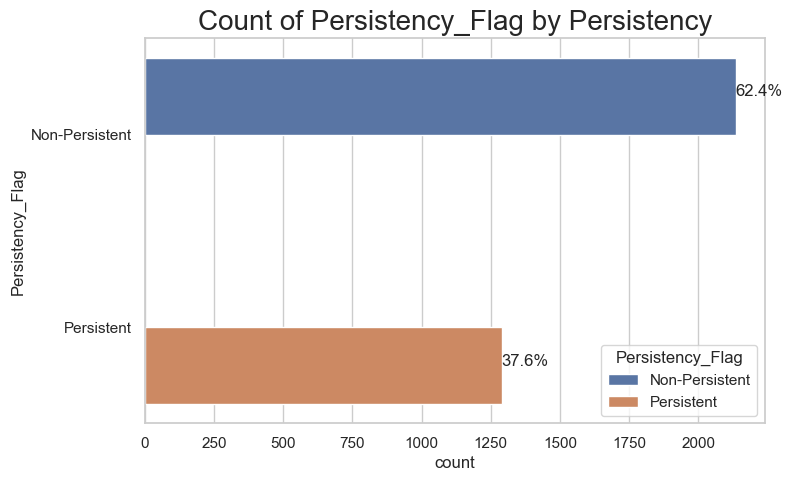

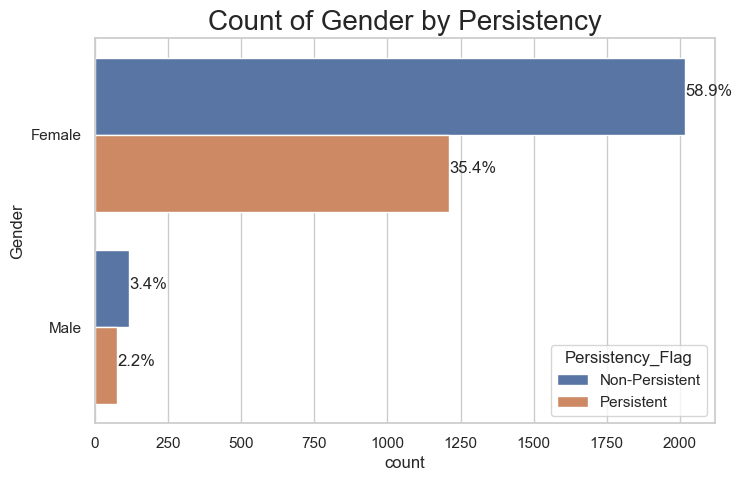

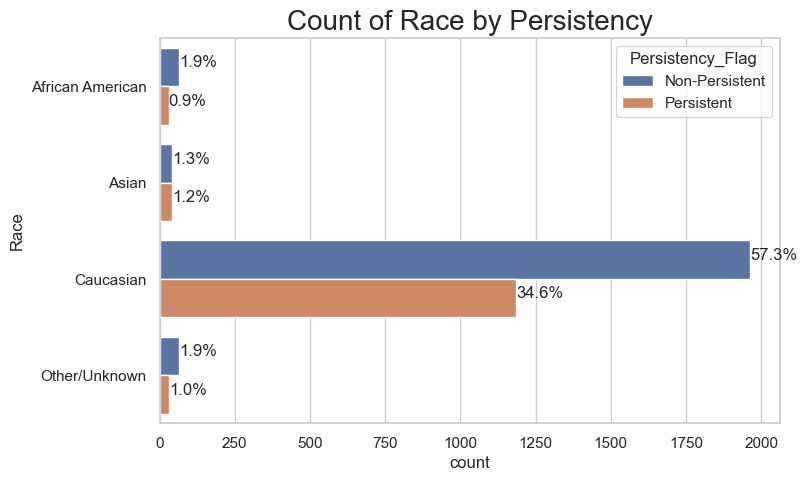

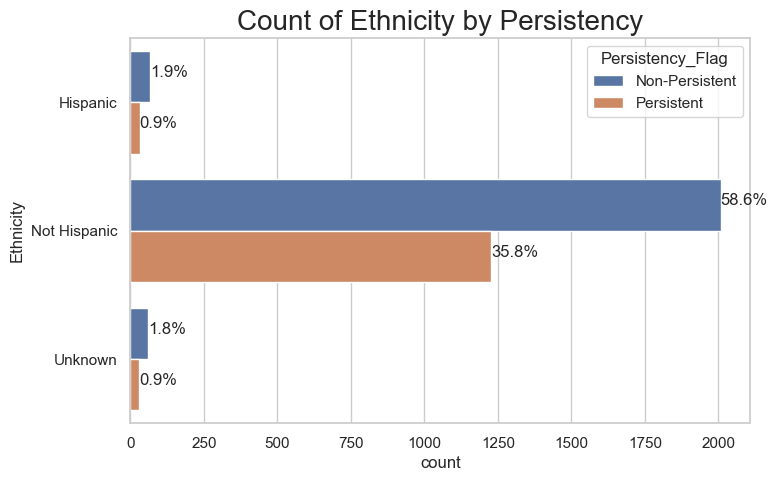

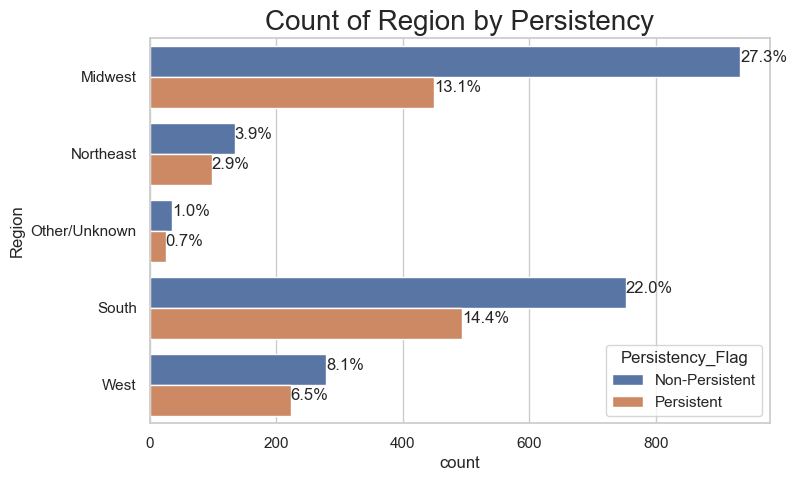

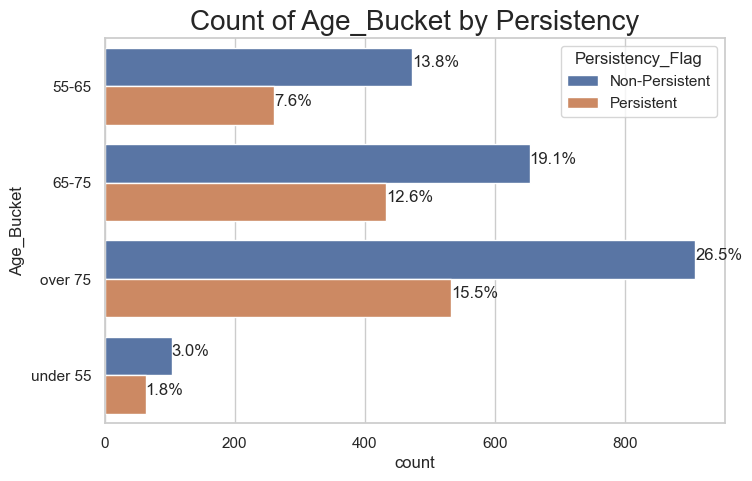

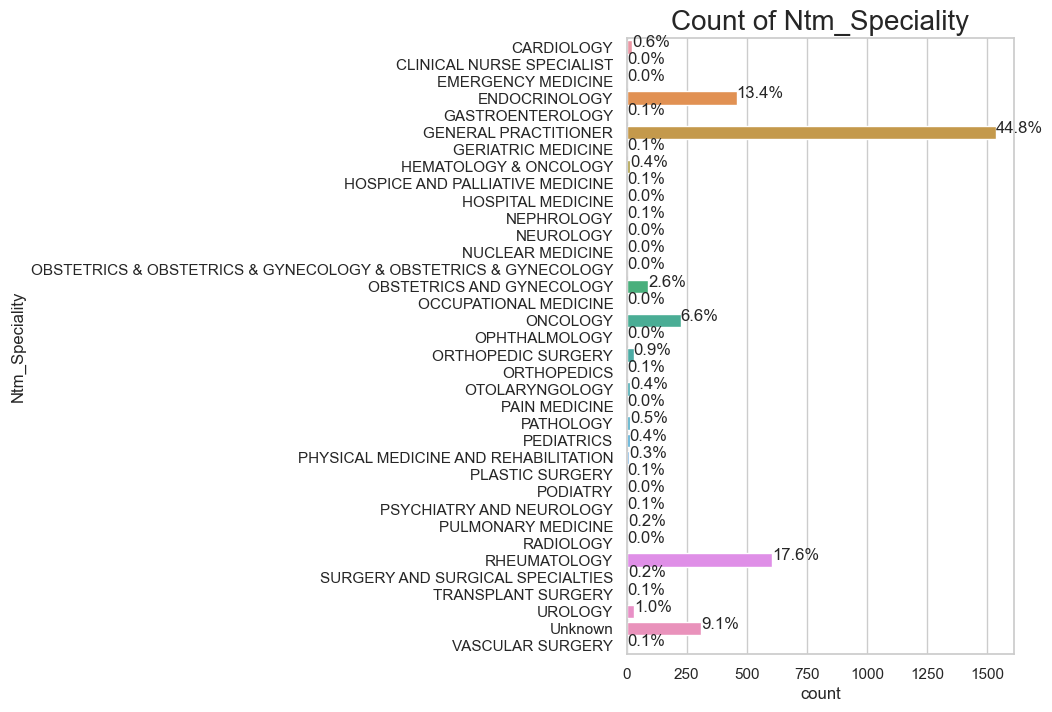

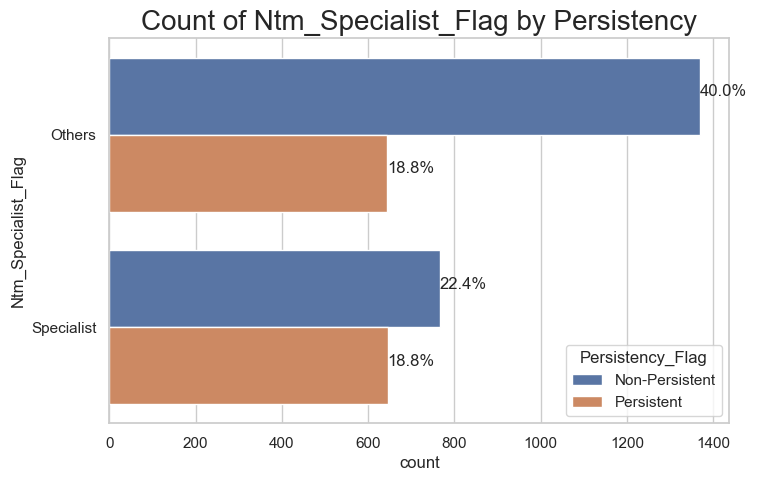

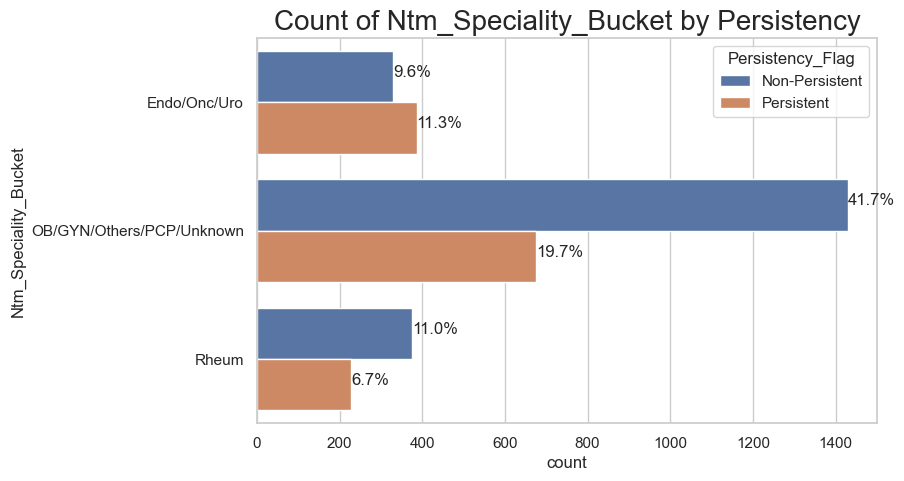

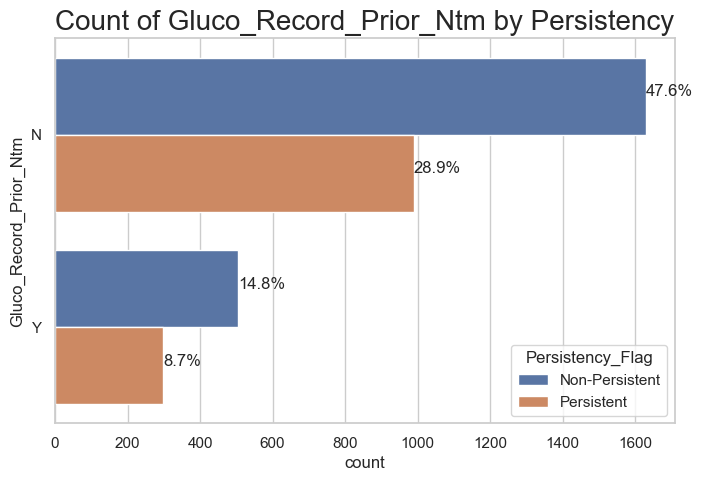

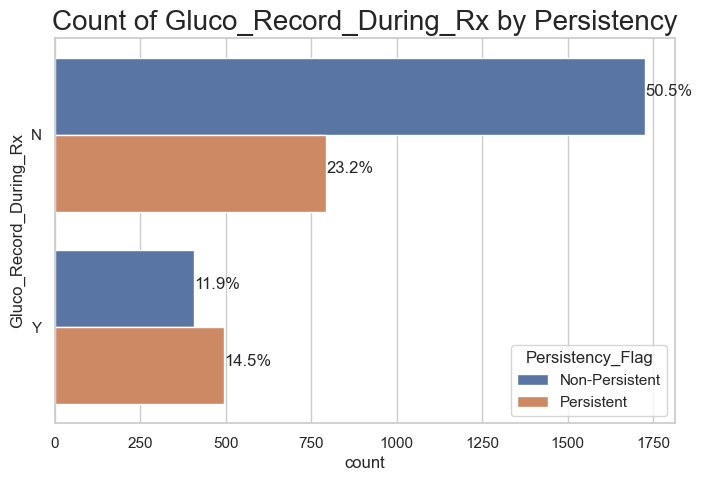

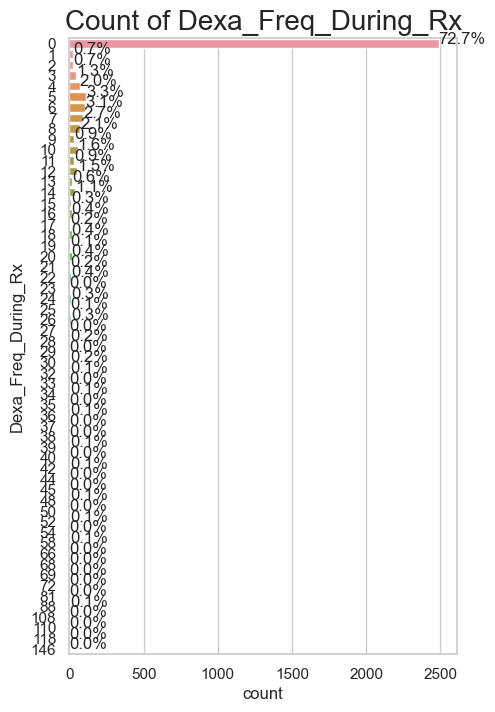

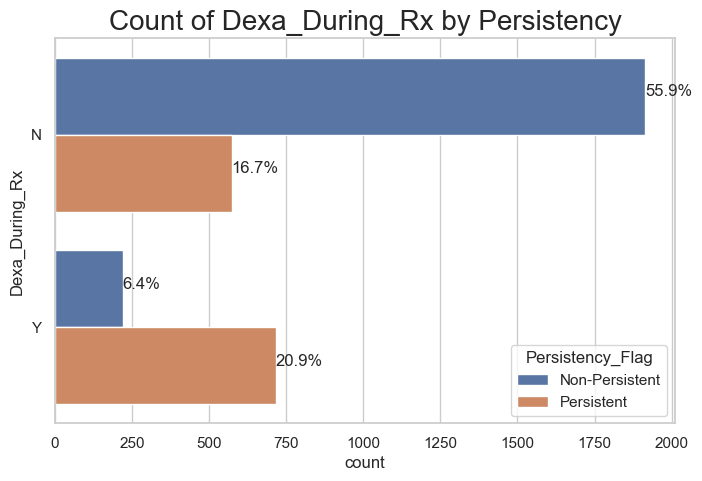

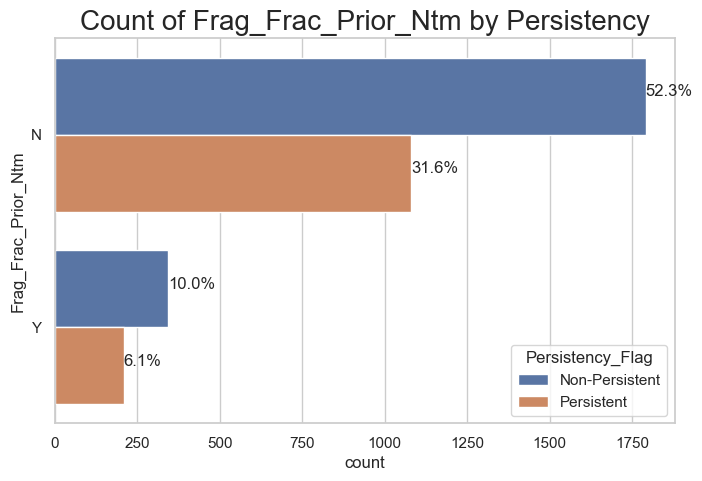

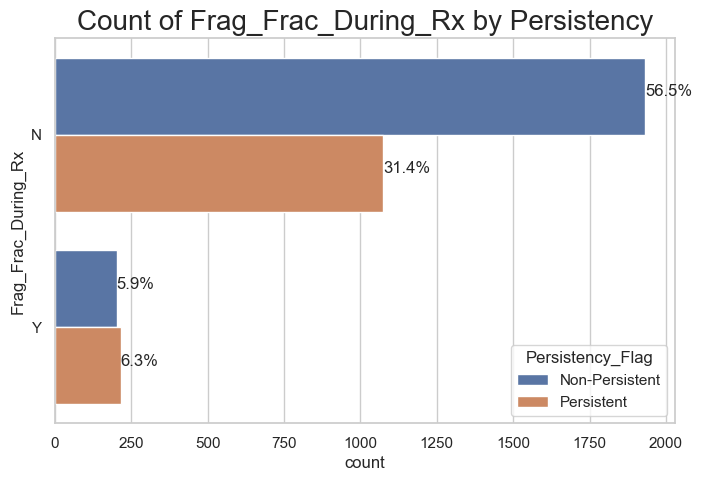

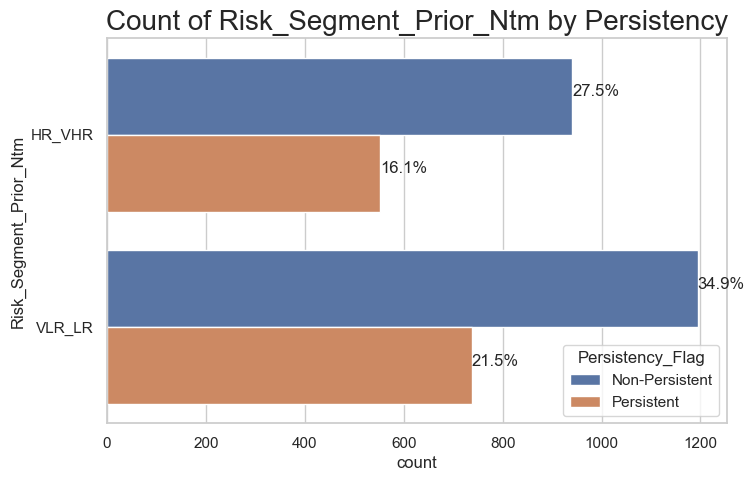

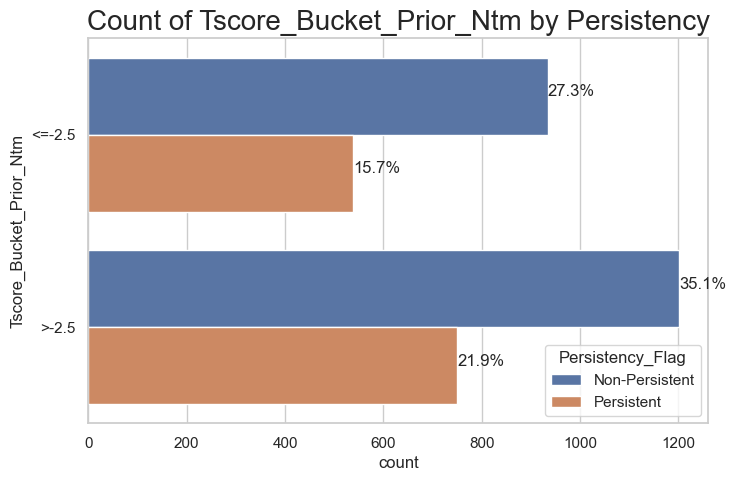

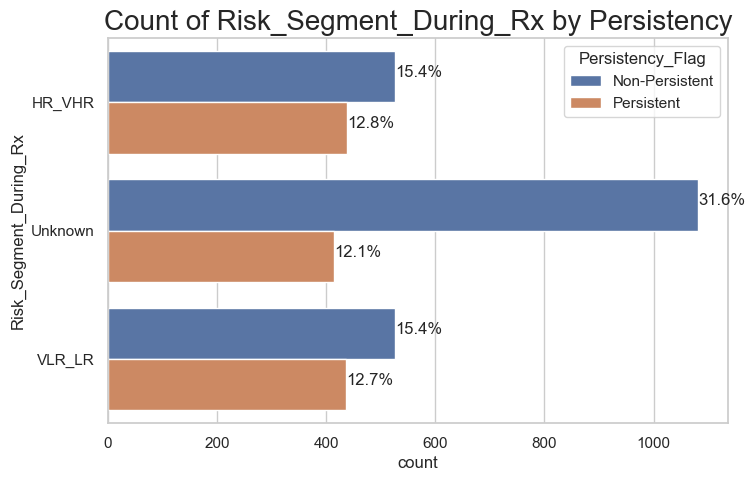

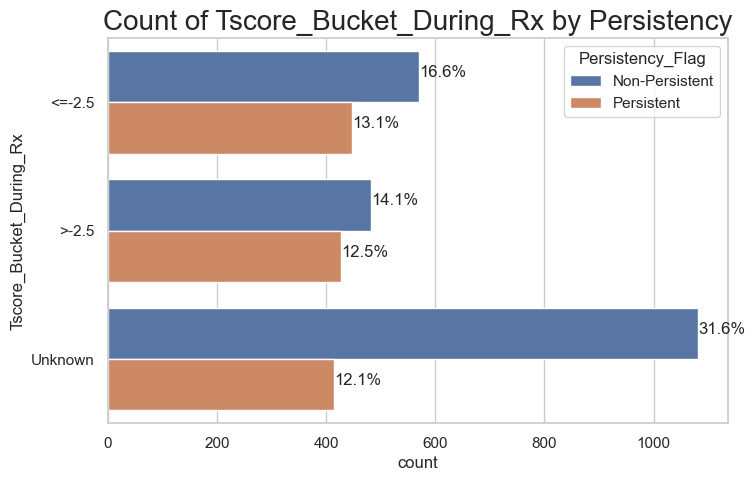

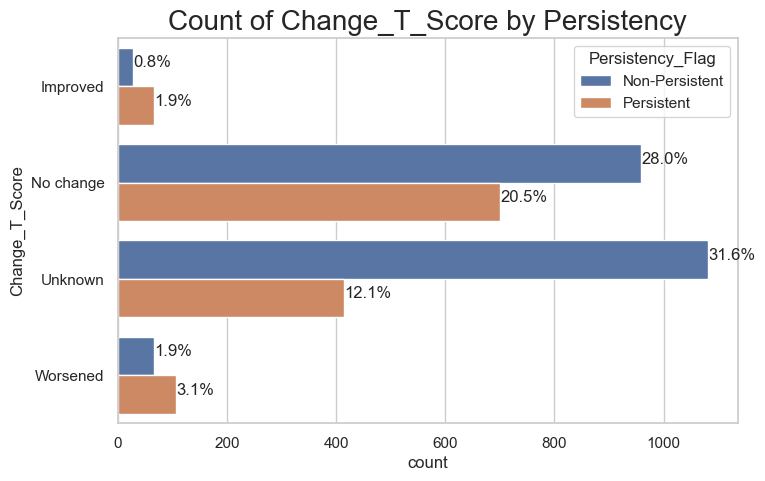

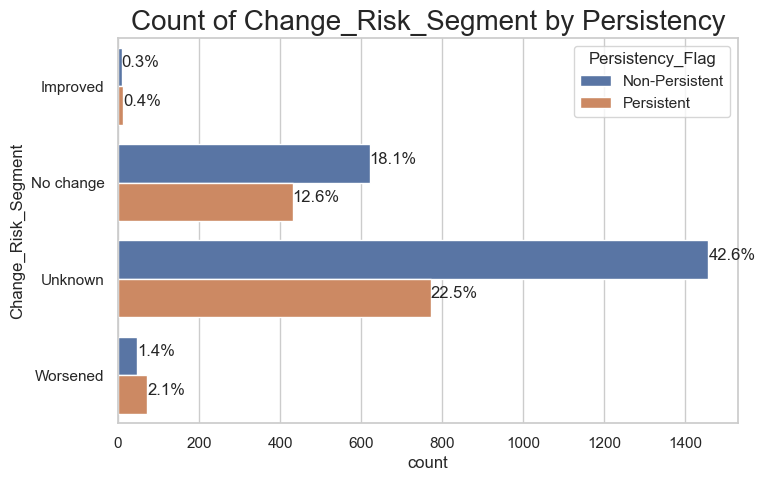

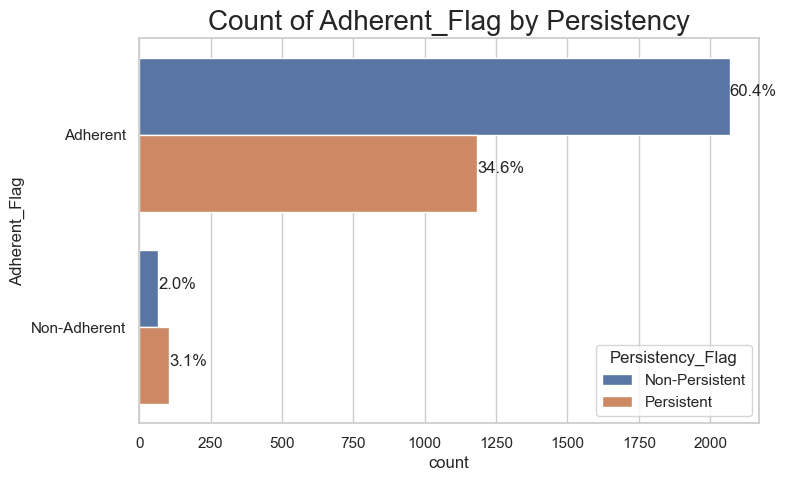

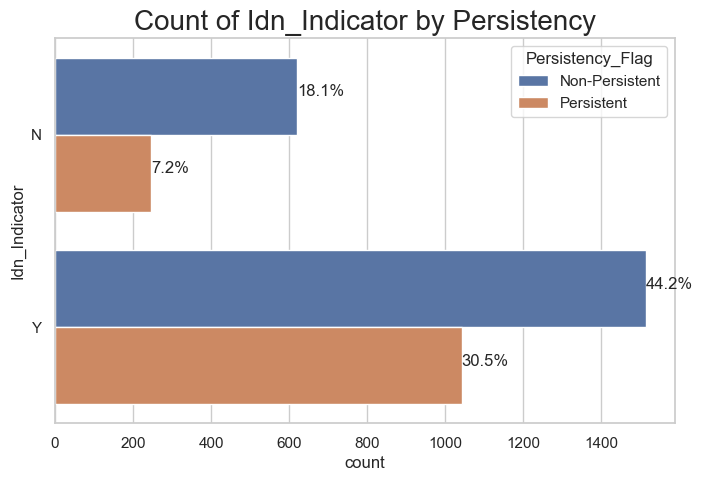

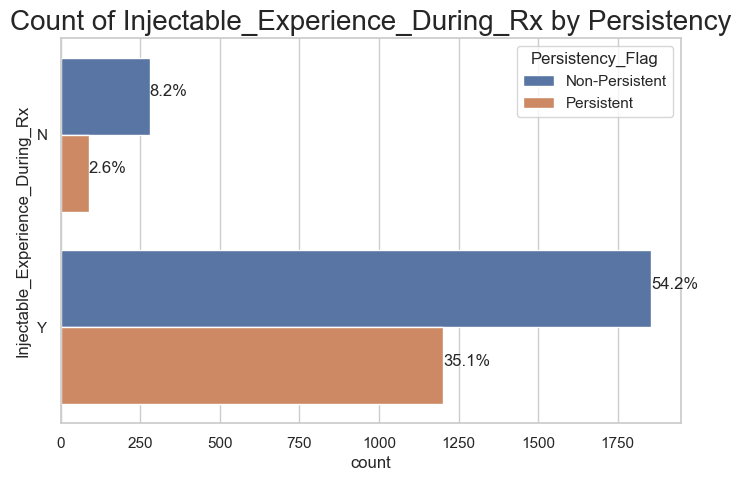

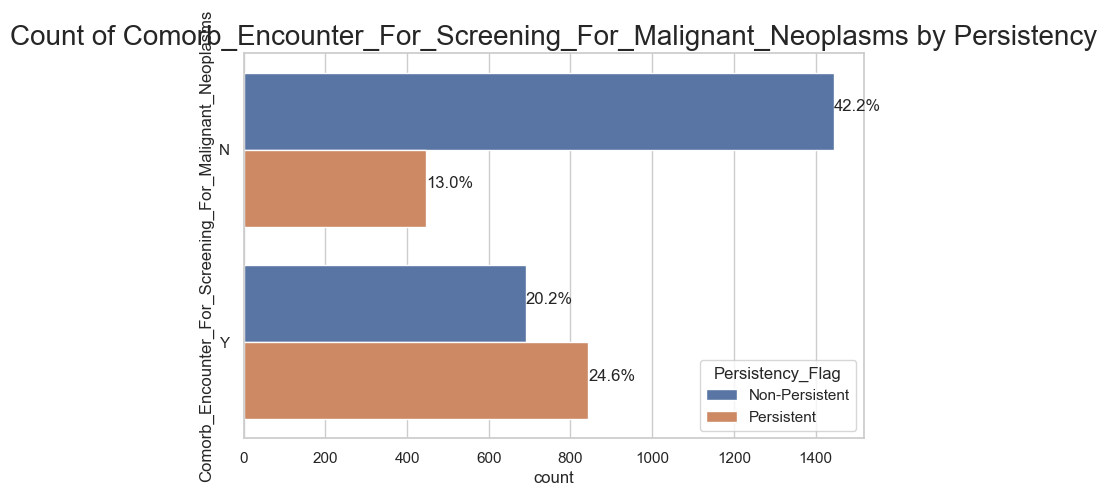

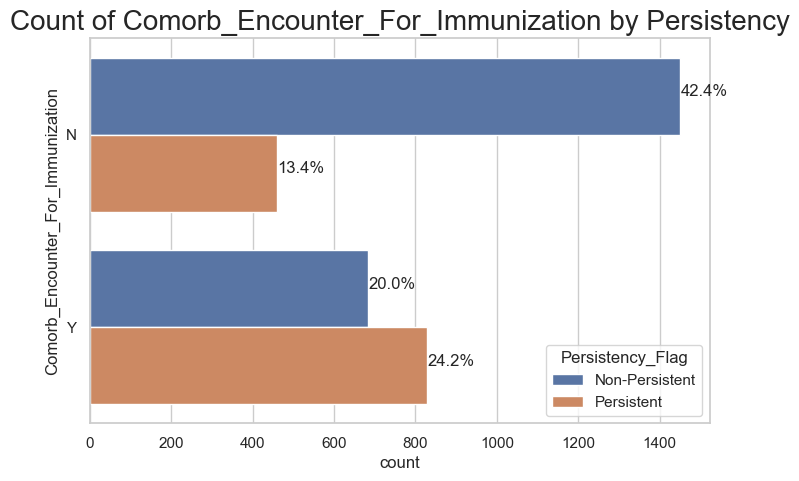

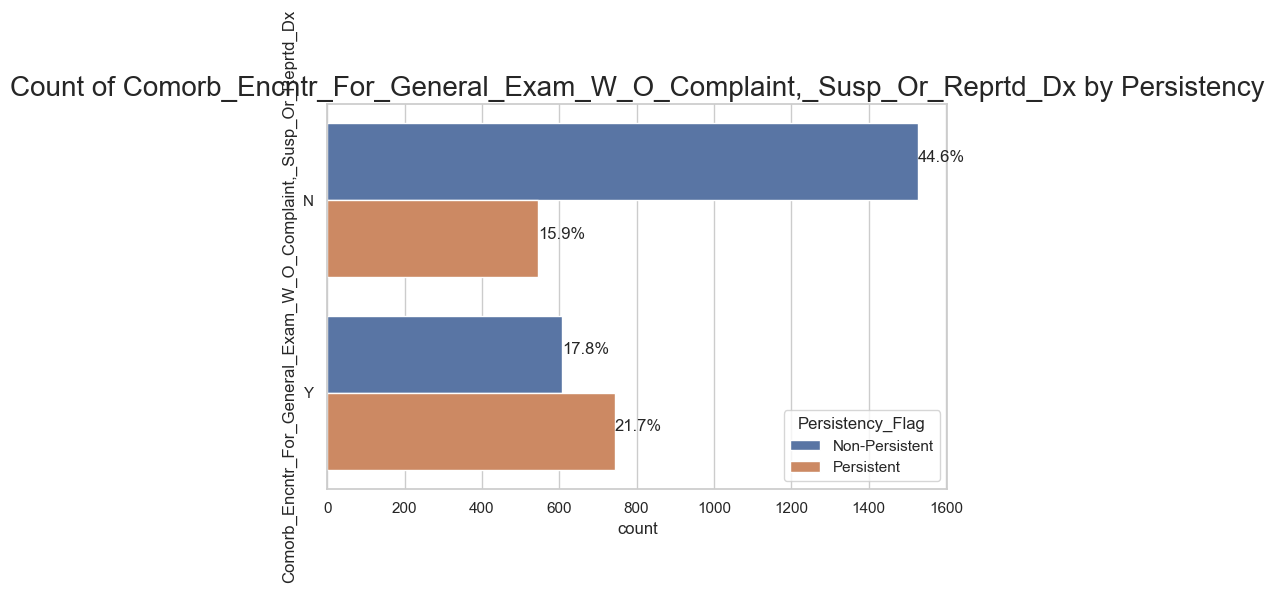

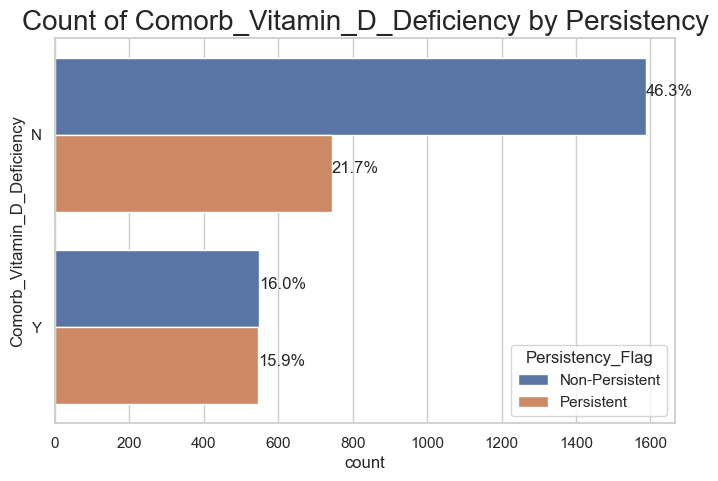

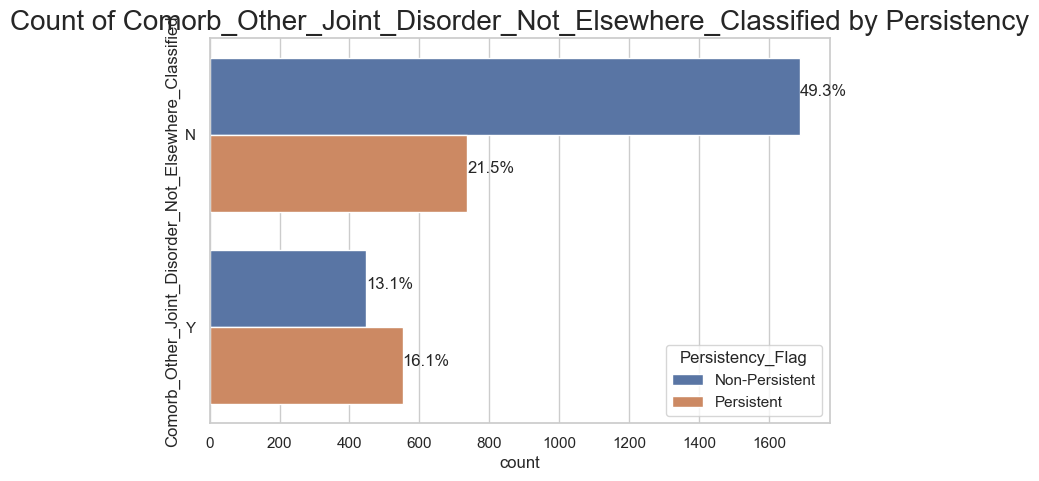

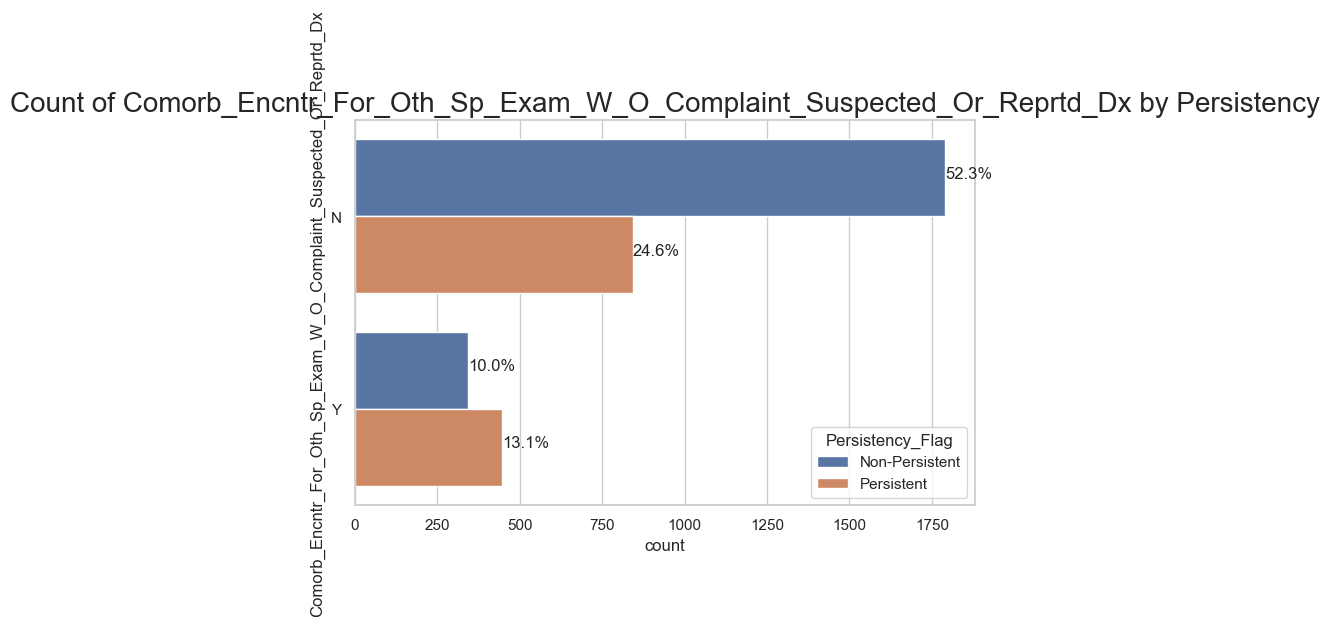

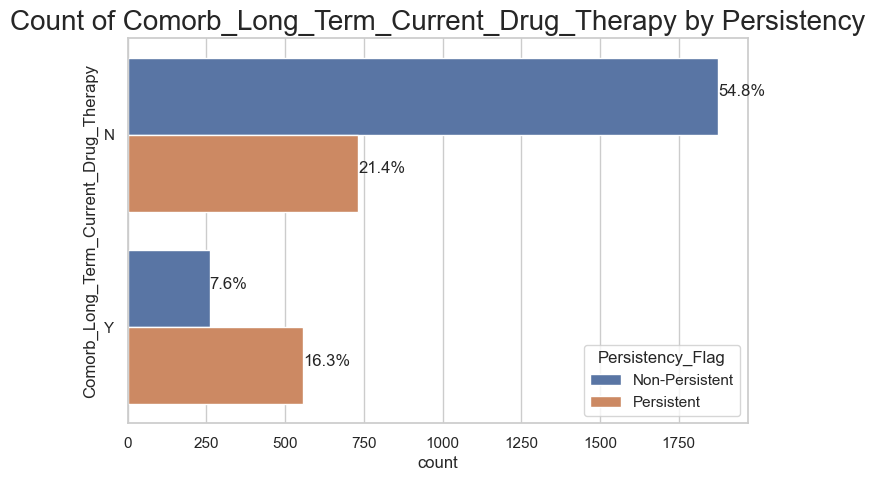

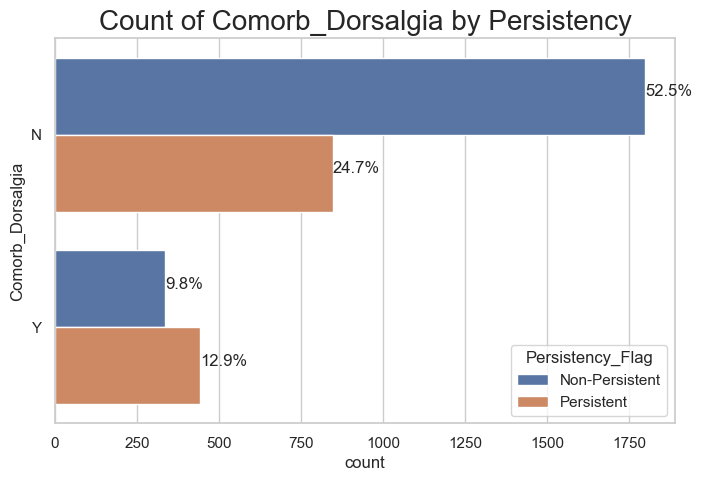

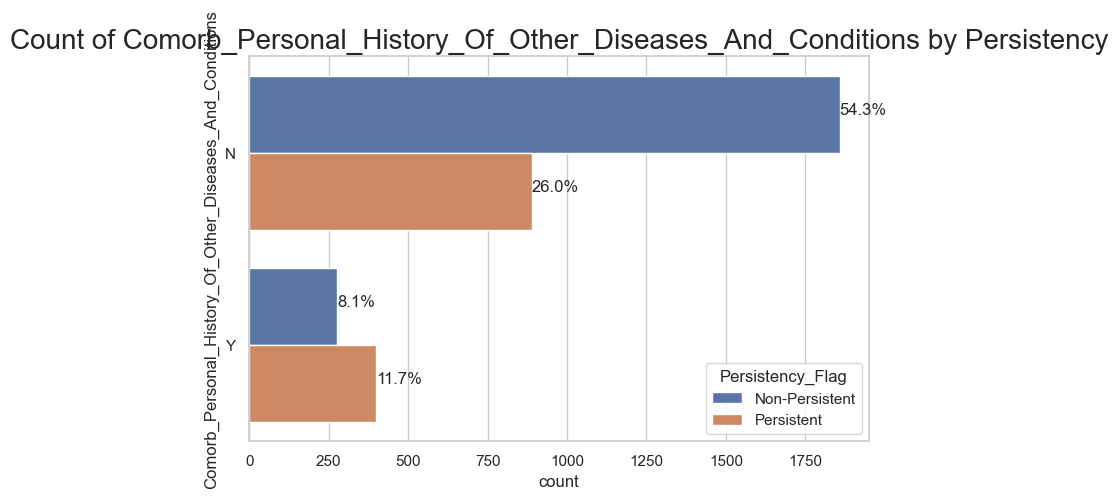

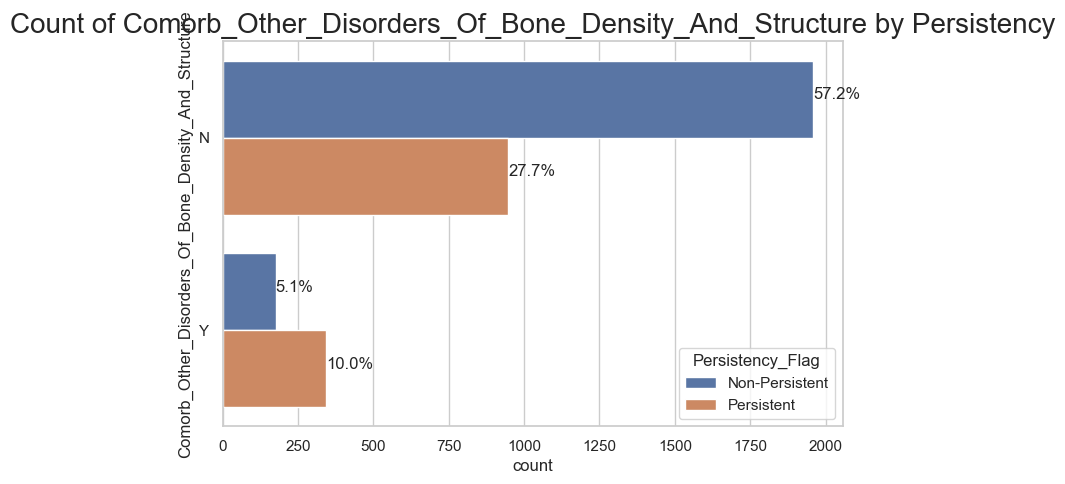

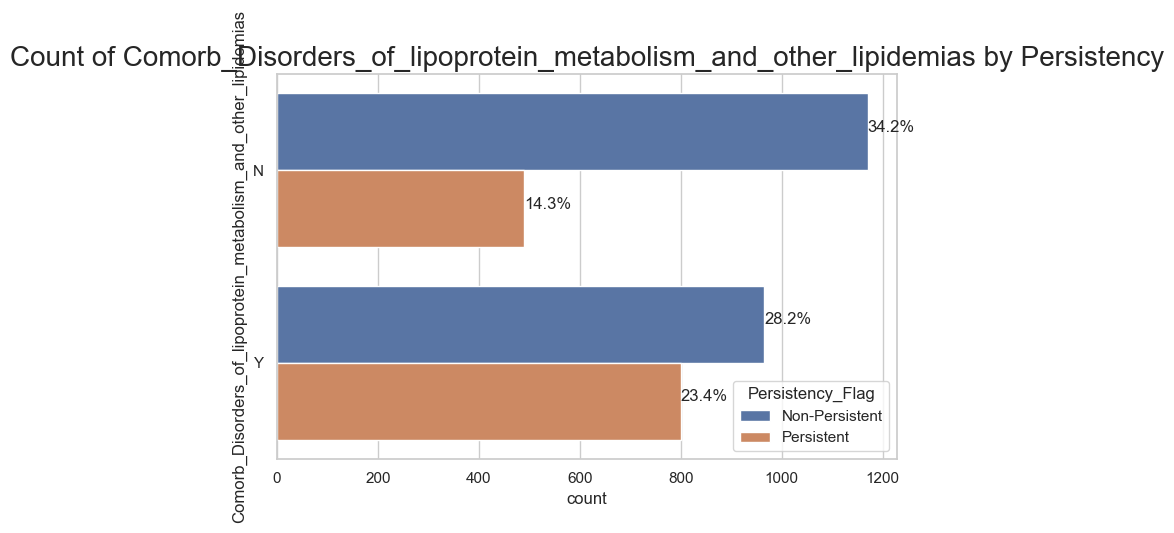

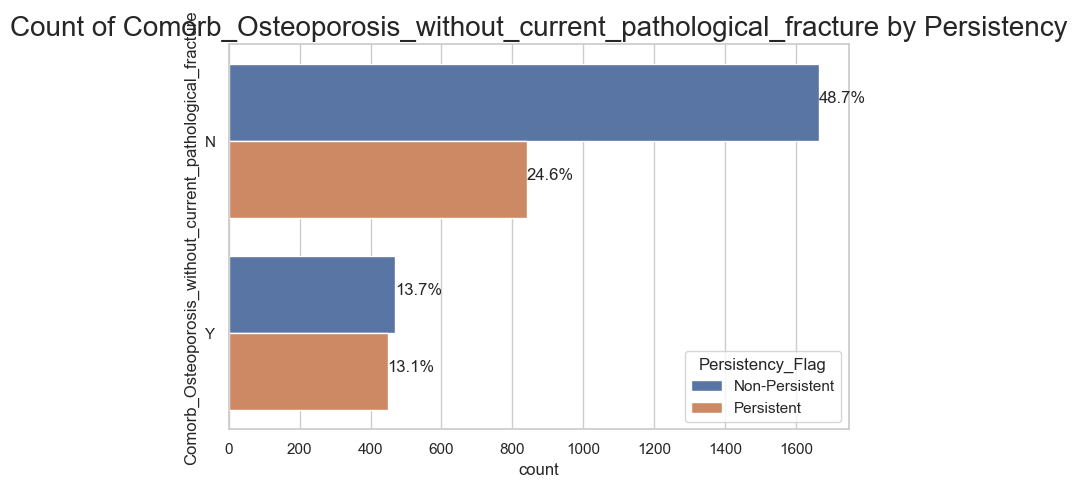

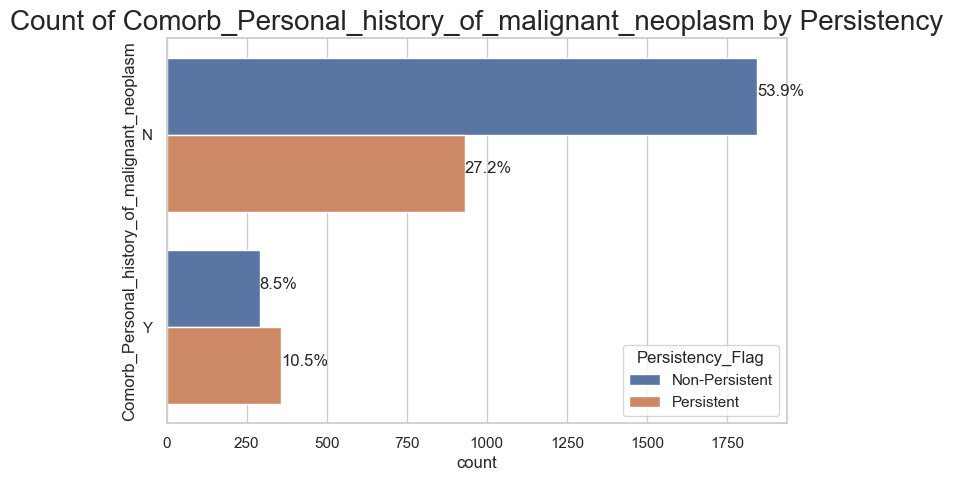

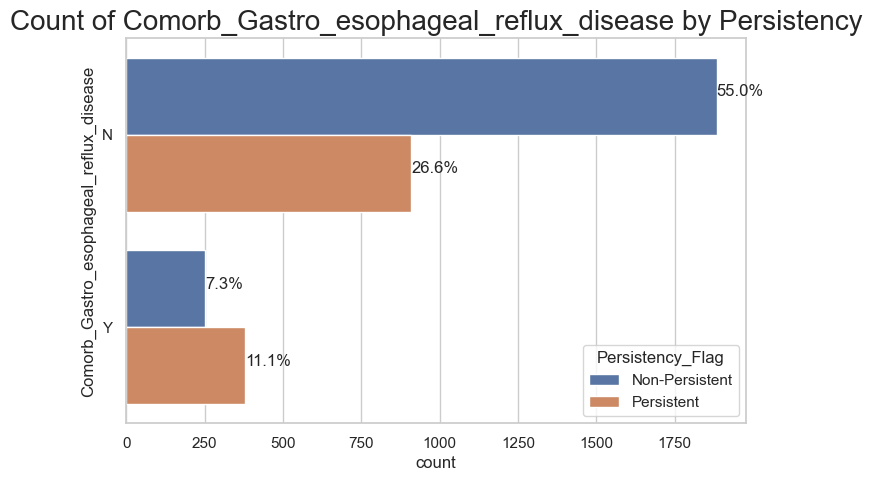

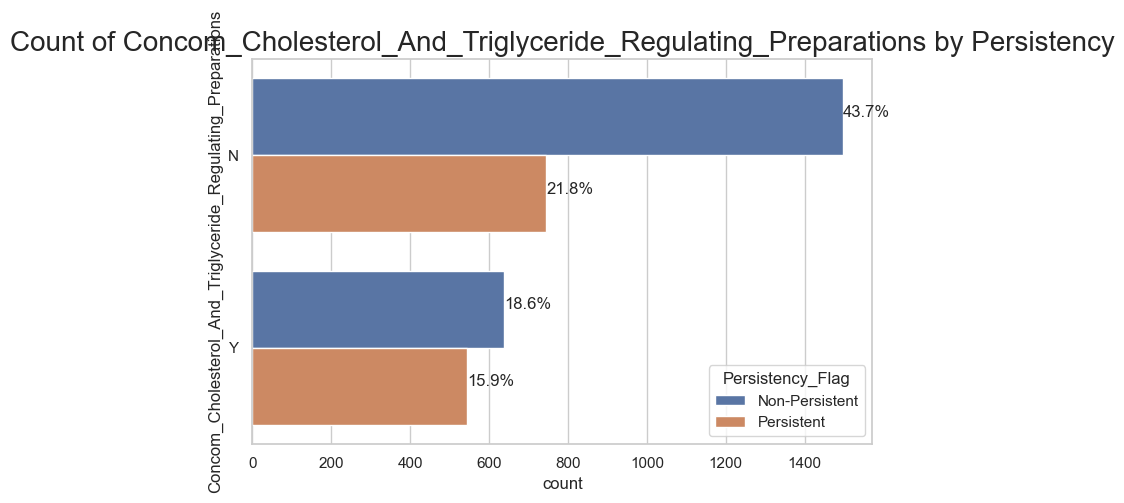

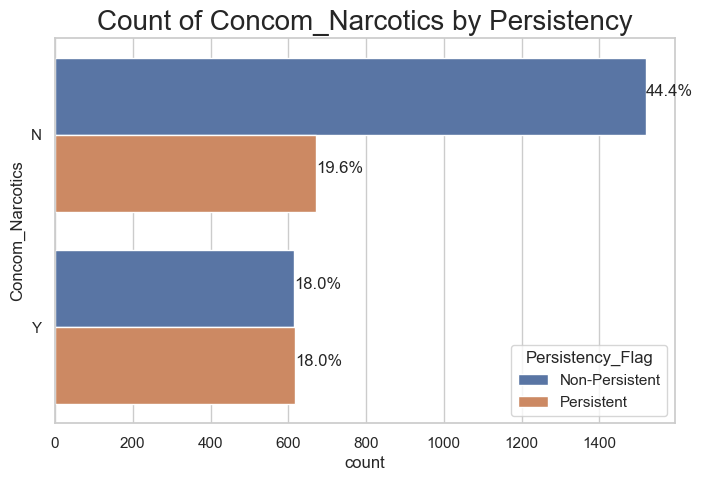

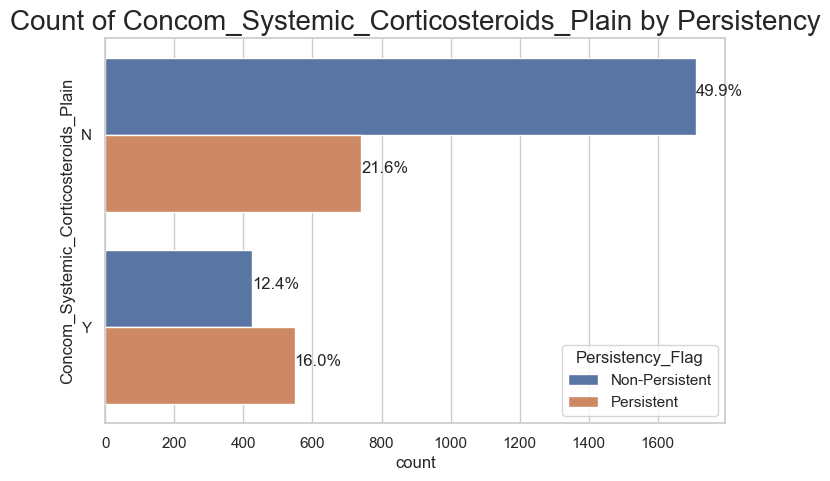

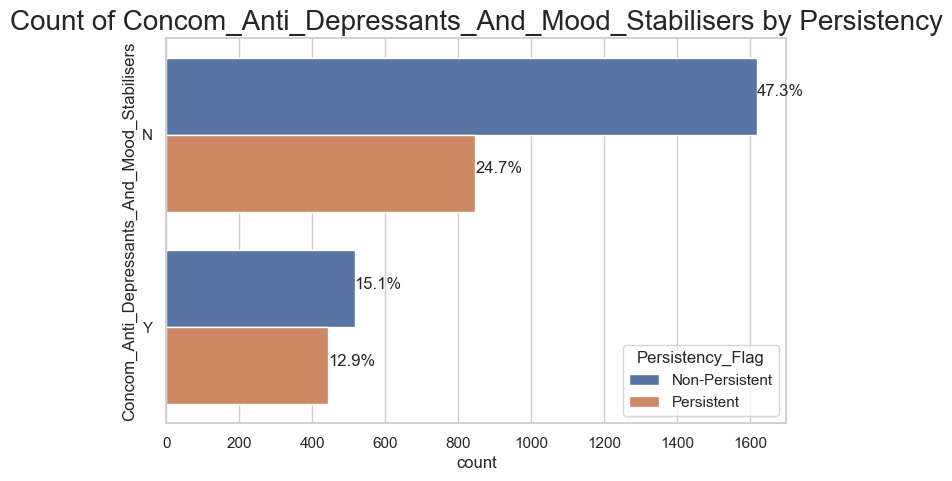

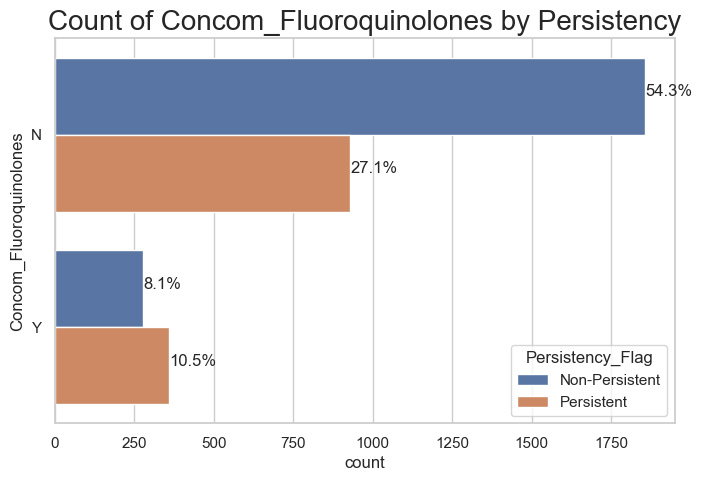

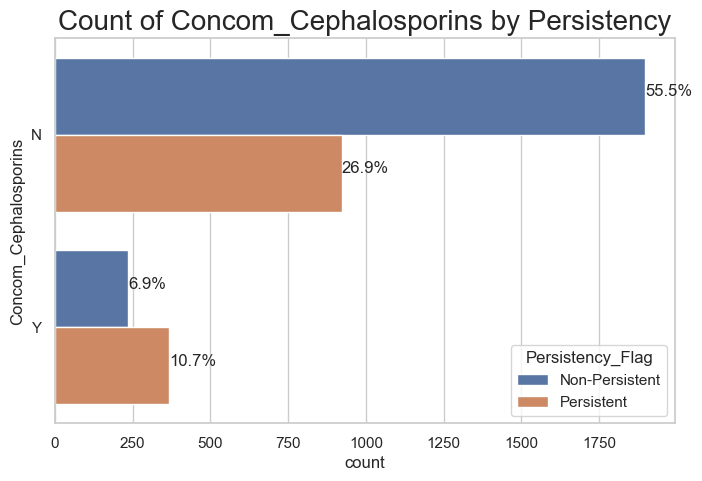

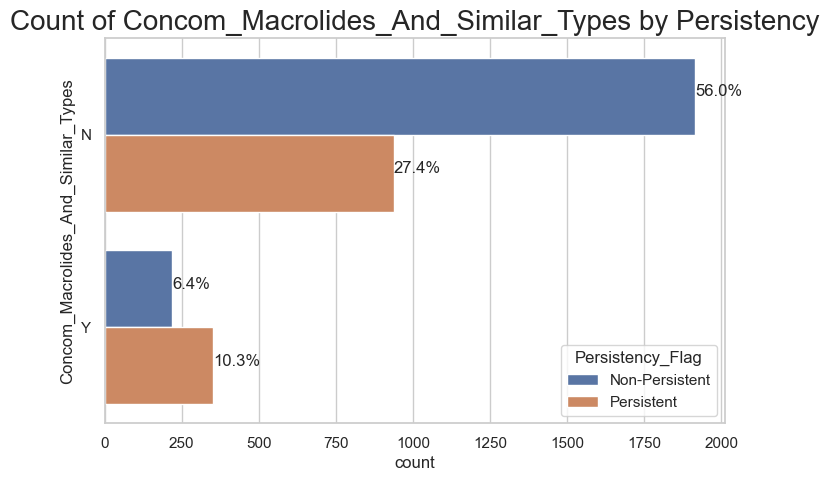

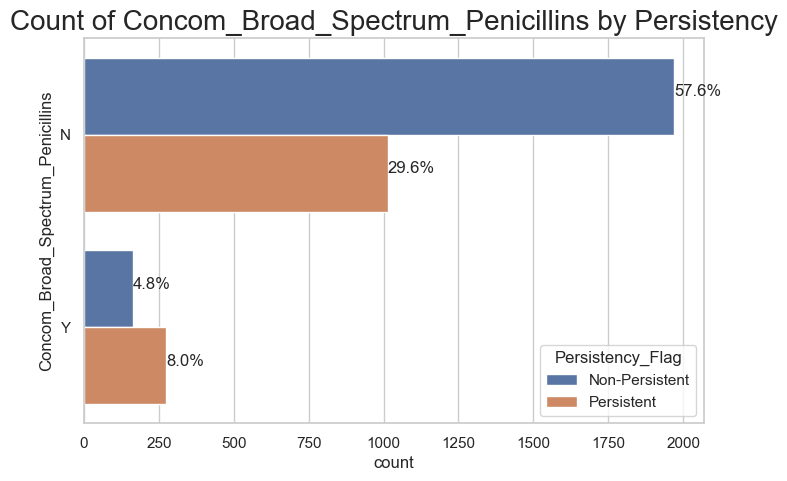

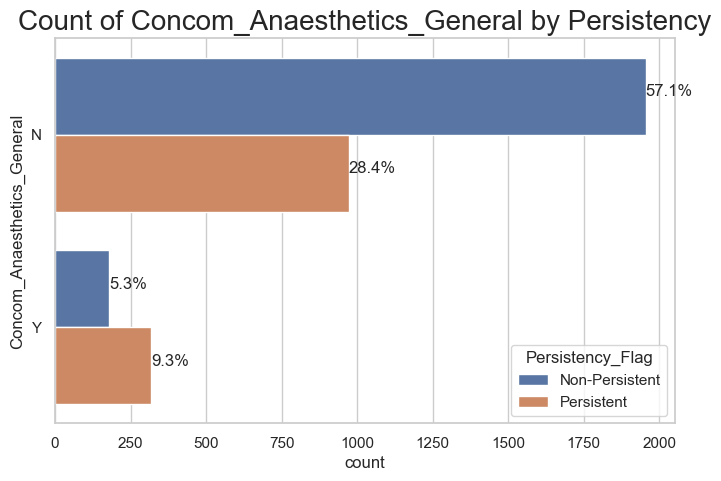

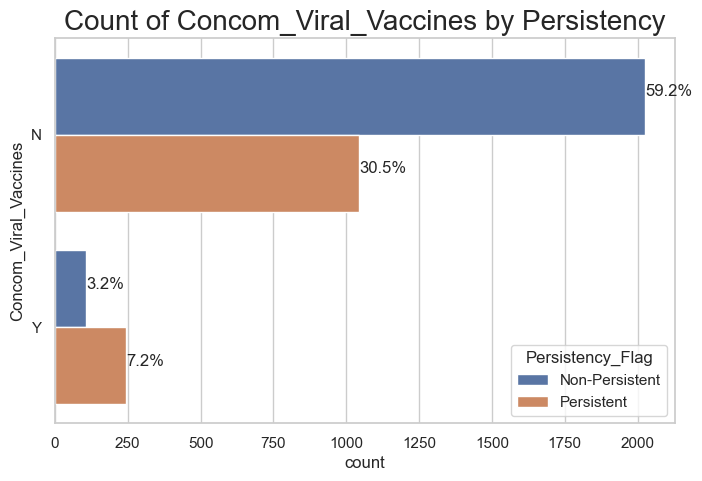

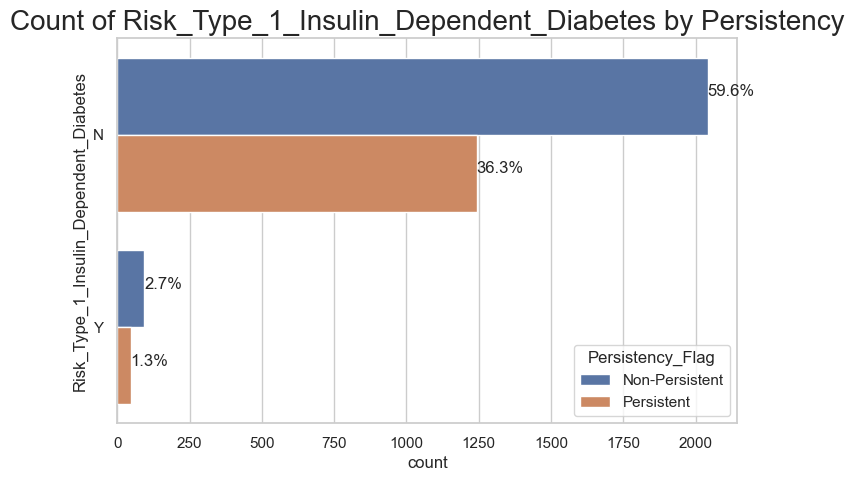

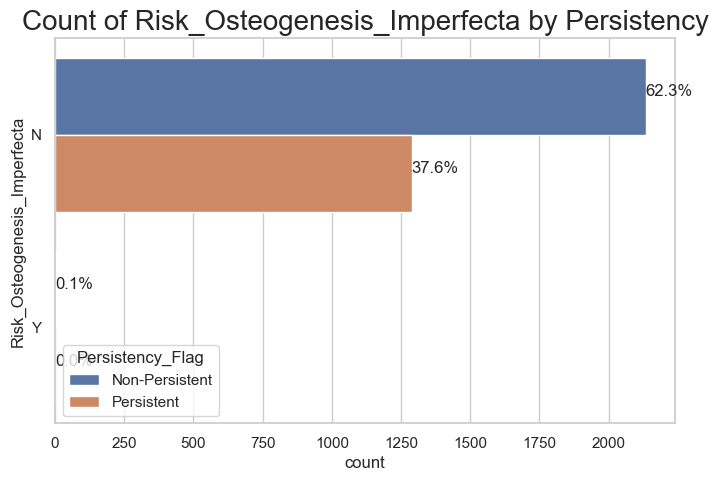

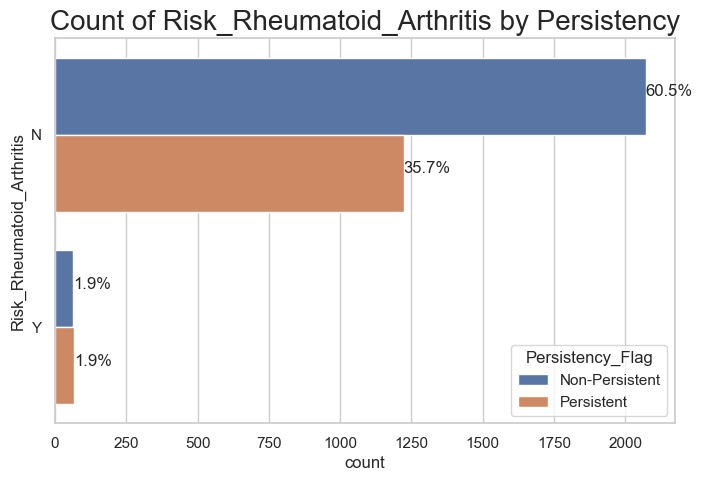

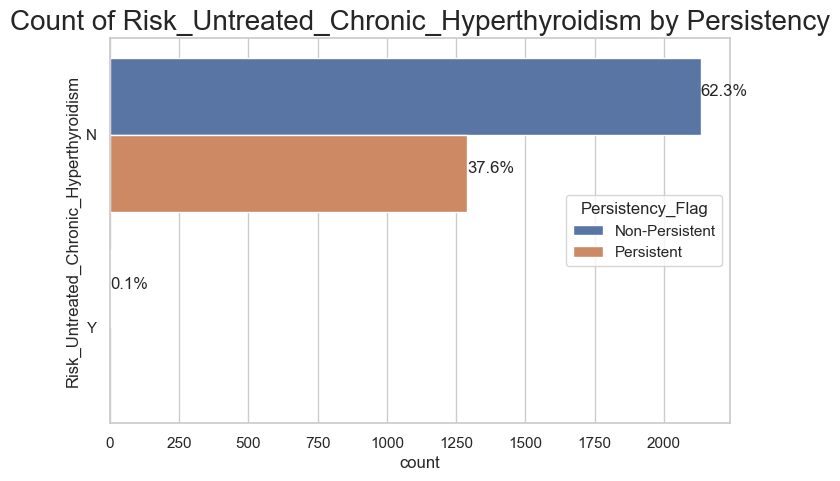

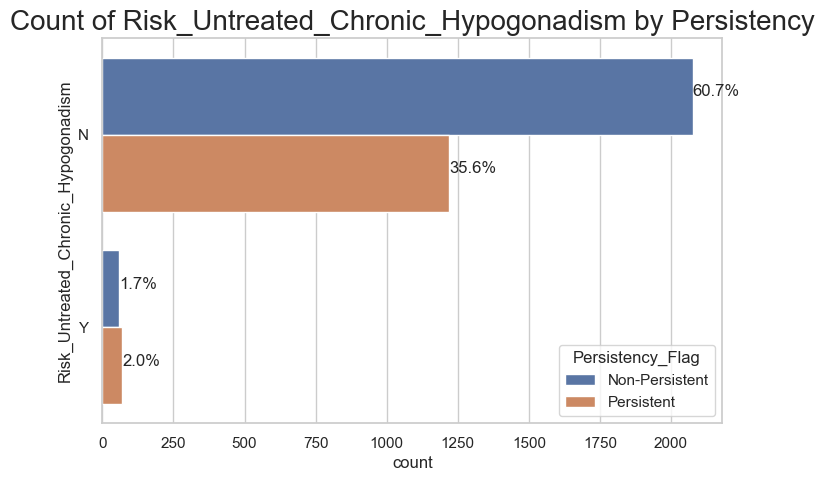

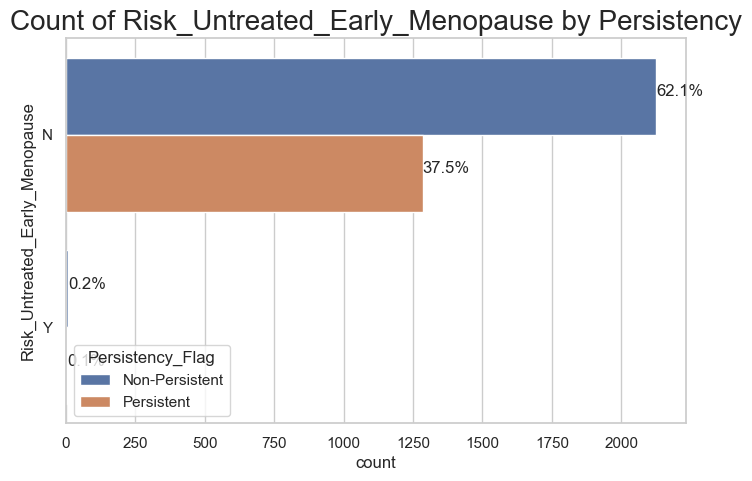

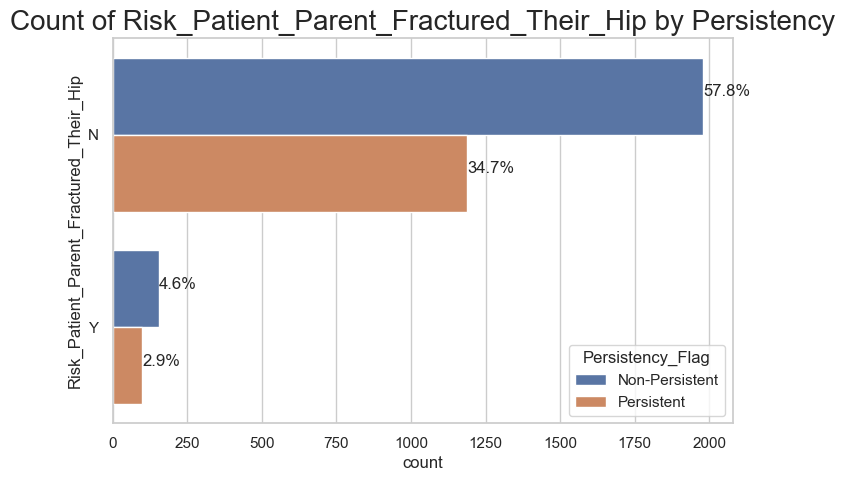

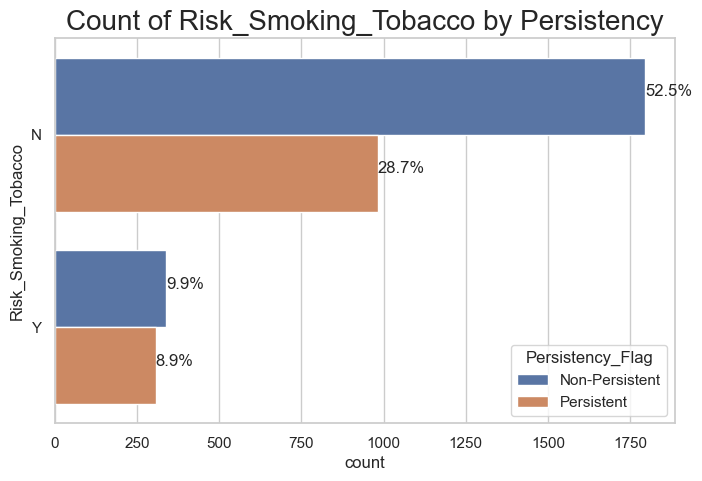

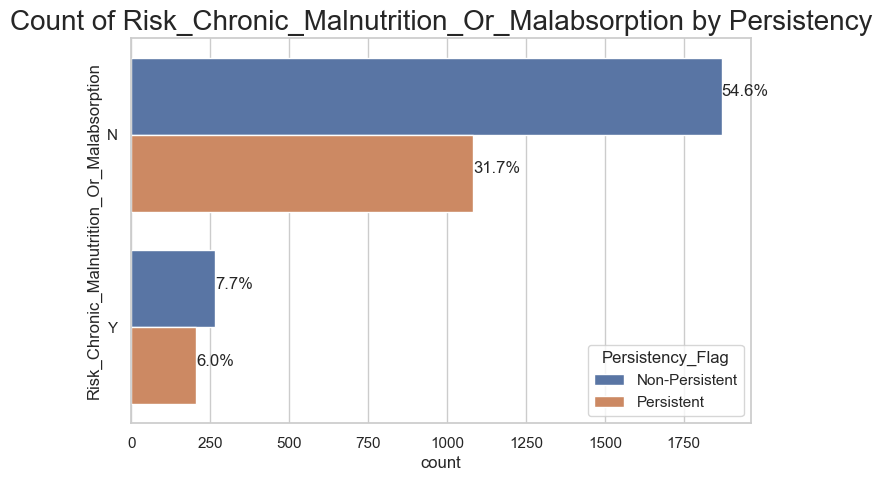

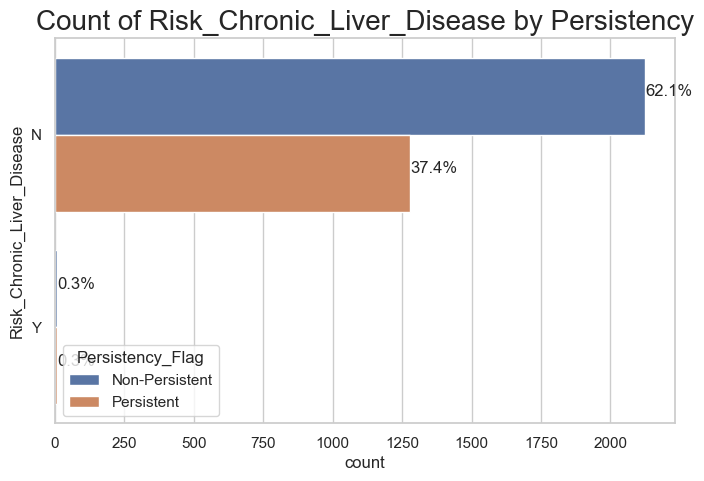

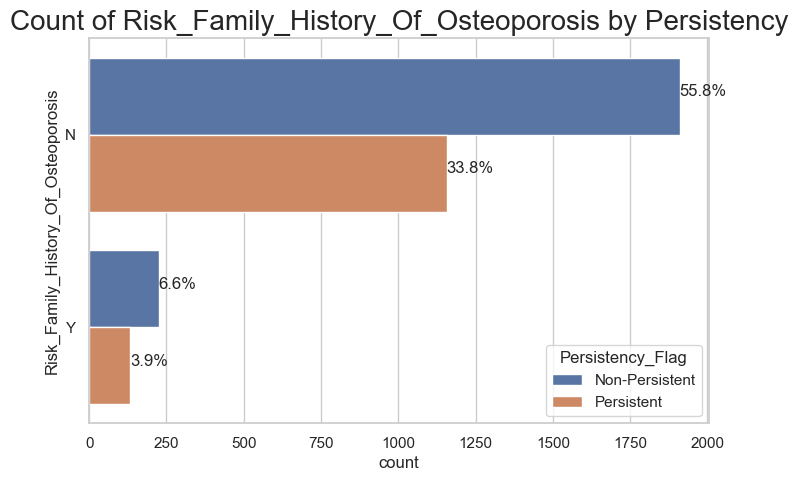

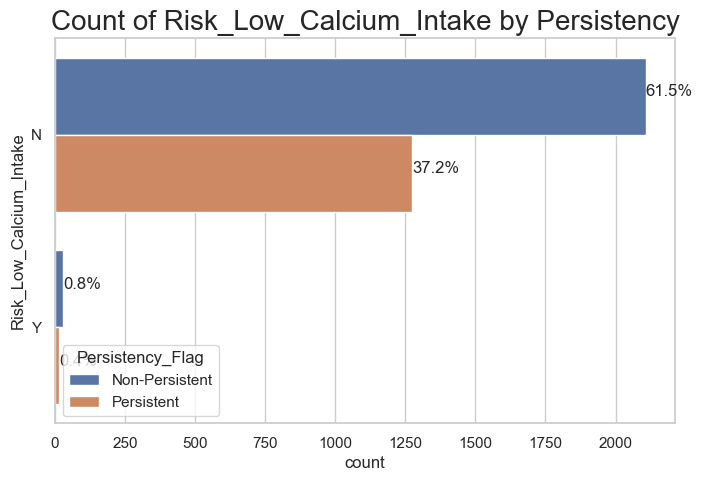

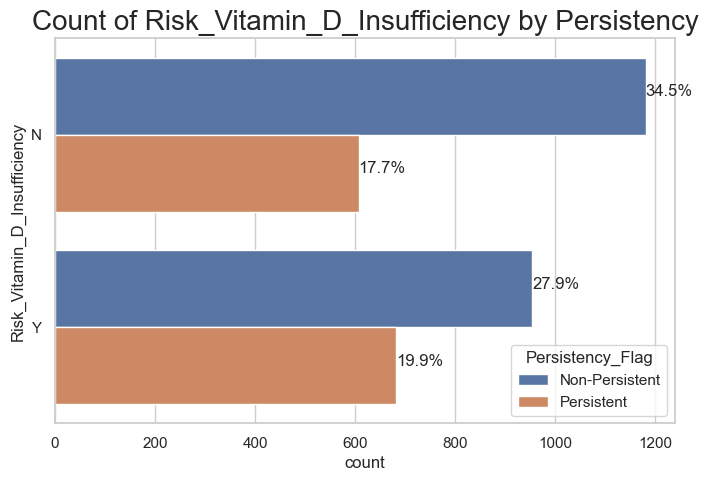

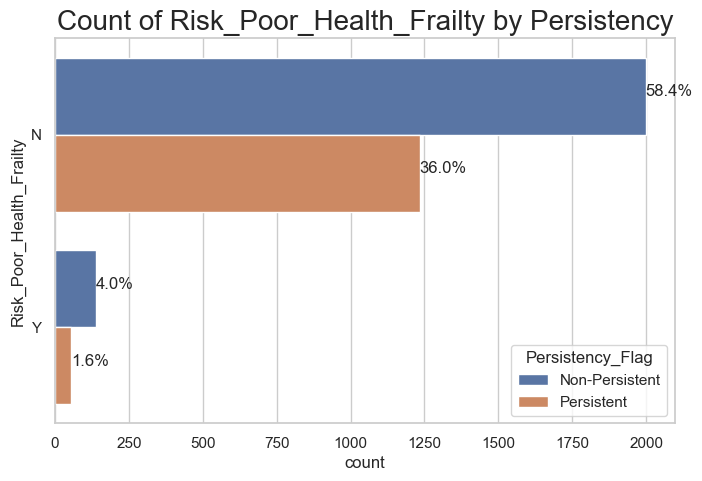

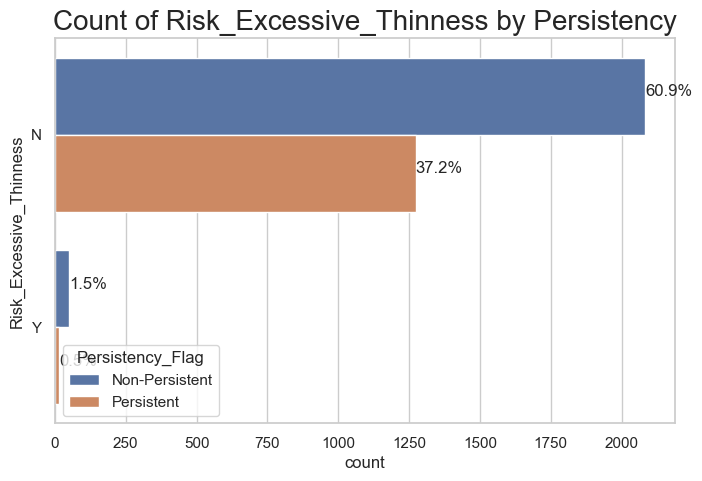

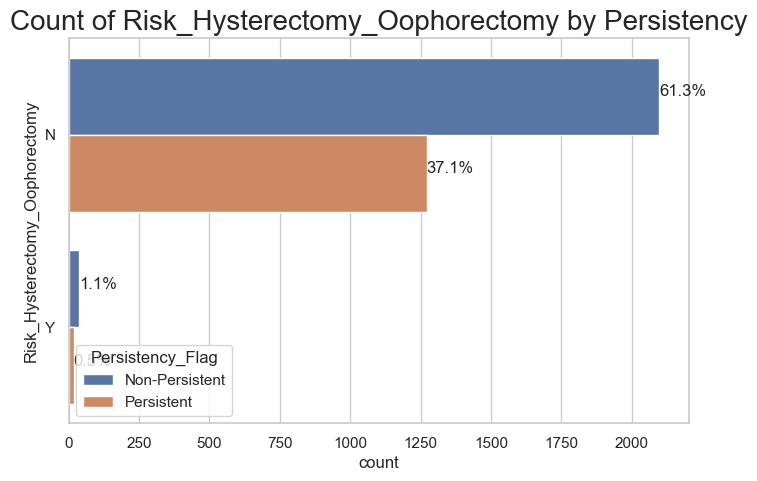

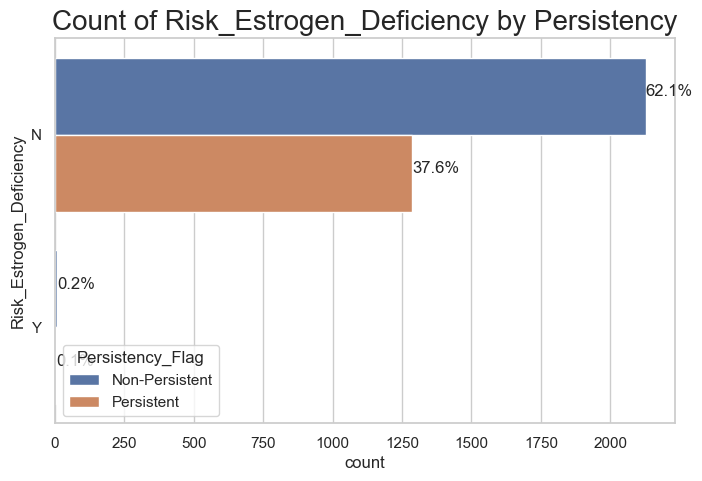

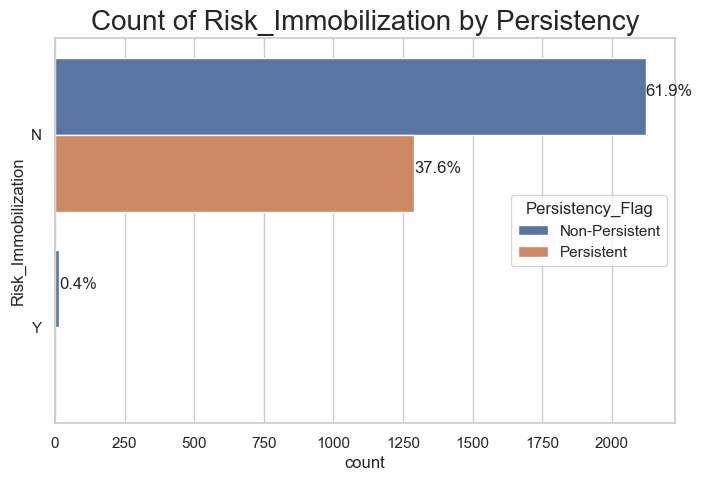

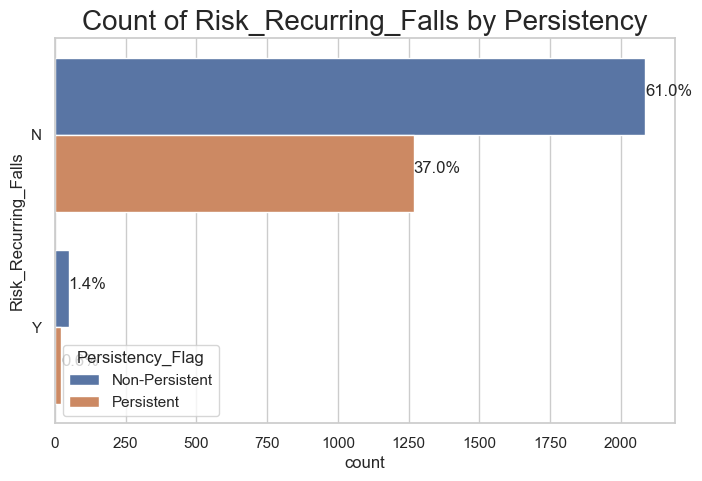

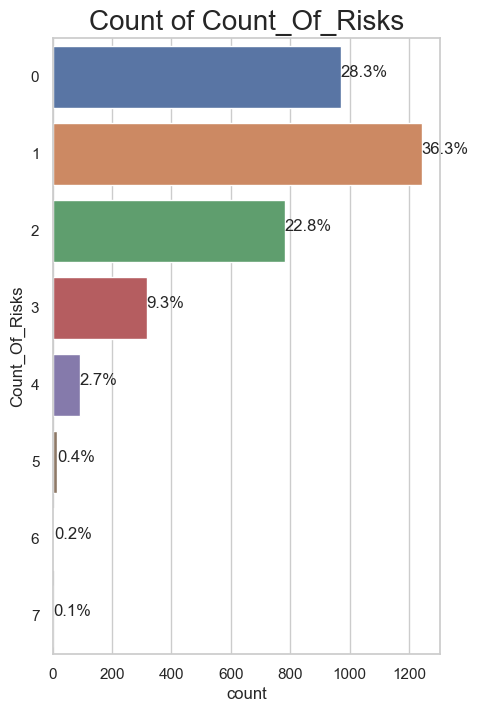

In [23]:
for i in df.columns:
    if df[i].nunique()<6:
        sns.set(style="whitegrid")
        plt.figure(figsize=(8,5))
        total = float(len(df))
        ax = sns.countplot(y=i, hue="Persistency_Flag", data=df,)
        plt.title("Count of {} by Persistency".format(i) , fontsize=20)
        for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/total)
                x = p.get_x() + p.get_width() + 0.02
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y))
    else:
        sns.set(style="whitegrid")
        plt.figure(figsize=(5,8))
        total = float(len(df))
        ax = sns.countplot(y=i, data=df,)
        plt.title("Count of {}".format(i) , fontsize=20)
        for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/total)
                x = p.get_x() + p.get_width() + 0.02
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y))
        
plt.show();


In [24]:
df["Persistency_Flag"]

0           Persistent
1       Non-Persistent
2       Non-Persistent
3       Non-Persistent
4       Non-Persistent
             ...      
3419        Persistent
3420        Persistent
3421        Persistent
3422    Non-Persistent
3423    Non-Persistent
Name: Persistency_Flag, Length: 3424, dtype: category
Categories (2, object): ['Non-Persistent', 'Persistent']

In [26]:
df_ml=df.copy()

In [27]:
X=df.drop("Persistency_Flag",axis=1)
y=df["Persistency_Flag"]
y=le.fit_transform(y)

In [28]:
a=X.columns

In [29]:
list_ohc=[]
for i in a:
    if X[i].nunique()==2:
        X[i]=le.fit_transform(X[i])
    else:
        list_ohc.append(i)
X=pd.get_dummies(X,columns=list_ohc,drop_first=True)    
    

In [35]:
dict_values=dict(pd.Series(y).value_counts())
print("Sınıf-0 :",dict_values[0])
print("Sınıf-1 :",dict_values[1])

Sınıf-0 : 2135
Sınıf-1 : 1289


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y, random_state=101)

In [33]:
Logit = LogisticRegression(solver='liblinear',random_state = 101)
Sgdc = SGDClassifier(random_state = 101)
Knn = KNeighborsClassifier()
Dtree = DecisionTreeClassifier(random_state = 101)
Rndfr = RandomForestClassifier(random_state = 101)
Mlp = MLPClassifier(random_state = 101)
Xgb = XGBClassifier(random_state = 101,eval_metric='mlogloss')

Algorithms =[Logit,Knn,Dtree,Rndfr,Xgb,Mlp,Sgdc]

In [34]:
l = []

for i in Algorithms:
    res = i.fit(X_train,y_train)
    l.append([str(i).split("(")[0],confusion_matrix(y_test,res.predict(X_test)),f1_score(y_test,res.predict(X_test)),round(accuracy_score(y_test, res.predict(X_test)), 3)])
    print(str(i).split("(")[0]," - "," ✓")
    
a1 = []
for i in l:
    a1.append([i[0],
              i[1][1][1]/(i[1][1][1]+i[1][1][0]),
              i[1][0][0]/(i[1][0][1]+i[1][0][0]),
              i[1][1][1]/(i[1][0][1]+i[1][1][1]),
              i[1][0][0]/(i[1][0][0]+i[1][1][0]),   
              i[1][0][1]+i[1][1][1],
              y_test.sum(),
              i[2],
              i[3]
              ]
             )
    
results_raw = pd.DataFrame(a1,columns = ["model","recall1","recall0","precision1","precision0","precision_sample","real_persistent_count","f1score","accuracyscore"]).fillna(0)
results_raw = results_raw.sort_values("f1score",ascending = False)
results_raw

LogisticRegression  -   ✓
KNeighborsClassifier  -   ✓
DecisionTreeClassifier  -   ✓
RandomForestClassifier  -   ✓
XGBClassifier  -   ✓
MLPClassifier  -   ✓
SGDClassifier  -   ✓


model   recall1   recall0  precision1  precision0  \
4           XGBClassifier  0.717647  0.909220    0.826558    0.842313   
0      LogisticRegression  0.703529  0.919149    0.839888    0.837209   
3  RandomForestClassifier  0.658824  0.930496    0.851064    0.818976   
5           MLPClassifier  0.703529  0.870922    0.766667    0.829730   
6           SGDClassifier  0.569412  0.951773    0.876812    0.785714   
2  DecisionTreeClassifier  0.611765  0.818440    0.670103    0.777628   
1    KNeighborsClassifier  0.376471  0.964539    0.864865    0.719577   

   precision_sample  real_persistent_count   f1score  accuracyscore  
4               369                    425  0.768262          0.837  
0               356                    425  0.765685          0.838  
3               329                    425  0.742706          0.828  
5               390                    425  0.733742          0.808  
6               276                    425  0.690442          0.808  
2               388                    425  0.639606          0.741  
1               185                    425  0.524590          0.743

In [36]:
xgboost = XGBClassifier(seed=0).fit(X_train,y_train)
param_grid = { 
    "max_depth":[1,2,4,5,6,10,30,40],
    "subsample":[0.1,0.2,0.5,0.7,0.8,1], "colsample_bytree":[0.1,0.5,1] ,"colsample_bylevel":[0.1,0.5,1],"learning_rate": [0,0.1,0.4,0.7,1],"n_estimator":[100,400,1000]
    }
# Set up score
scoring = ['f1']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=101)

In [37]:
grid_search = GridSearchCV(estimator=xgboost, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='f1', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
grid_result

NameError: name 'grid_result' is not defined

In [ ]:
grid_result.best_params_

In [ ]:
xgb_results

In [38]:
xgb_results=results_raw[results_raw["model"]=="XGBClassifier"]

In [39]:
model=XGBClassifier(colsample_bylevel= 1,
 colsample_bytree= 0.5,
 learning_rate= 0.1,
 max_depth= 5,
 n_estimator= 100,
 subsample= 0.7)

res=model.fit(X_train,y_train)


l=[]
l.append(["XGBClassifierTuned",confusion_matrix(y_test,res.predict(X_test)),f1_score(y_test,res.predict(X_test)),round(accuracy_score(y_test, res.predict(X_test)), 3)])
print(str(i).split("(")[0]," - "," ✓")
    
a1 = []
for i in l:
    a1.append([i[0],
              i[1][1][1]/(i[1][1][1]+i[1][1][0]),
              i[1][0][0]/(i[1][0][1]+i[1][0][0]),
              i[1][1][1]/(i[1][0][1]+i[1][1][1]),
              i[1][0][0]/(i[1][0][0]+i[1][1][0]),   
              i[1][0][1]+i[1][1][1],
              y_test.sum(),
              i[2],
              i[3]
              ]
             )
    
xgb_scores= pd.DataFrame(a1,columns = ["model","recall1","recall0","precision1","precision0","precision_sample","real_persistent_count","f1score","accuracyscore"]).fillna(0)
xgb_scores = xgb_scores.sort_values("f1score",ascending = False)
xgb_results = xgb_results.append(xgb_scores)
xgb_results

[16:34:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

['SGDClassifier', array  -   ✓


model   recall1   recall0  precision1  precision0  \
4       XGBClassifier  0.717647  0.909220    0.826558    0.842313   
0  XGBClassifierTuned  0.722353  0.920567    0.845730    0.846154   

   precision_sample  real_persistent_count   f1score  accuracyscore  
4               369                    425  0.768262          0.837  
0               363                    425  0.779188          0.846

In [40]:
testsize=[0.2,0.4,0.3]

In [41]:
for i in testsize:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i,stratify=y, random_state=101)
    res=model.fit(X_train,y_train)


    l=[]
    l.append(["XGBClassifiertestsize{}".format(i),confusion_matrix(y_test,res.predict(X_test)),f1_score(y_test,res.predict(X_test)),round(accuracy_score(y_test, res.predict(X_test)), 3)])
    print(str(i).split("(")[0]," - "," ✓")
        
    a1 = []
    for i in l:
        a1.append([i[0],
                  i[1][1][1]/(i[1][1][1]+i[1][1][0]),
                  i[1][0][0]/(i[1][0][1]+i[1][0][0]),
                  i[1][1][1]/(i[1][0][1]+i[1][1][1]),
                  i[1][0][0]/(i[1][0][0]+i[1][1][0]),   
                  i[1][0][1]+i[1][1][1],
                  y_test.sum(),
                  i[2],
                  i[3]
                  ]
                 )
        
    xgb_scores= pd.DataFrame(a1,columns = ["model","recall1","recall0","precision1","precision0","precision_sample","real_persistent_count","f1score","accuracyscore"]).fillna(0)
    xgb_scores = xgb_scores.sort_values("f1score",ascending = False)
    xgb_results = xgb_results.append(xgb_scores)
xgb_results.sort_values("f1score",ascending=False)

[16:34:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

0.2  -   ✓
[16:34:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

0.4  -   ✓
[16:34:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

0.3  -   ✓


model   recall1   recall0  precision1  precision0  \
0        XGBClassifierTuned  0.722353  0.920567    0.845730    0.846154   
0  XGBClassifiertestsize0.4  0.711240  0.916862    0.837900    0.840129   
4             XGBClassifier  0.717647  0.909220    0.826558    0.842313   
0  XGBClassifiertestsize0.3  0.708010  0.912637    0.830303    0.838109   
0  XGBClassifiertestsize0.2  0.697674  0.896956    0.803571    0.830803   

   precision_sample  real_persistent_count   f1score  accuracyscore  
0               363                    425  0.779188          0.846  
0               438                    516  0.769392          0.839  
4               369                    425  0.768262          0.837  
0               330                    387  0.764296          0.836  
0               224                    258  0.746888          0.822